# Smart Factory Energy Prediction Challenge

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings for suppressing unnecessary messages
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [2]:
df = pd.read_csv("data/data.csv")
# Displaying the first few rows of the dataset
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### Exploratory Data Analysis

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [4]:
# Statistical summary
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [5]:
df.shape

(16857, 29)

In [6]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [7]:
df.dtypes

timestamp                        object
equipment_energy_consumption     object
lighting_energy                  object
zone1_temperature                object
zone1_humidity                   object
zone2_temperature                object
zone2_humidity                  float64
zone3_temperature               float64
zone3_humidity                  float64
zone4_temperature               float64
zone4_humidity                  float64
zone5_temperature               float64
zone5_humidity                  float64
zone6_temperature               float64
zone6_humidity                  float64
zone7_temperature               float64
zone7_humidity                  float64
zone8_temperature               float64
zone8_humidity                  float64
zone9_temperature               float64
zone9_humidity                  float64
outdoor_temperature             float64
atmospheric_pressure            float64
outdoor_humidity                float64
wind_speed                      float64


In [8]:
# Unique values count
unique_counts = df.nunique().sort_values()
print("Unique values per column:\n", unique_counts)


Unique values per column:
 lighting_energy                    20
equipment_energy_consumption      130
wind_speed                        168
visibility_index                  376
zone1_temperature                 433
zone9_temperature                 514
outdoor_humidity                  607
zone2_temperature                 838
zone3_temperature                 862
zone4_temperature                 923
dew_point                        1145
zone7_temperature                1427
outdoor_temperature              1434
zone5_temperature                1633
zone8_temperature                1672
zone3_humidity                   1986
atmospheric_pressure             2106
zone2_humidity                   2166
zone1_humidity                   2172
zone9_humidity                   2387
zone4_humidity                   2445
zone6_temperature                3144
zone7_humidity                   4931
zone8_humidity                   5382
zone5_humidity                   6278
zone6_humidity         

In [9]:
df['equipment_energy_consumption'].value_counts()

equipment_energy_consumption
50.0      3400
60.0      2385
40.0      1762
70.0      1193
80.0       905
          ... 
850.0        1
890.0        1
1070.0       1
830.0        1
-200.0       1
Name: count, Length: 130, dtype: int64

In [10]:
df.tail()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
16852,2016-10-03 20:10:00,1139.9856929495108,20.0,22.1,38.723333333333294,19.79,39.566667,21.29,38.845,21.39,...,18.100000,40.09,5.816667,761.466667,68.333333,2.000000,64.666667,0.366667,10.707282,10.707282
16853,2016-10-04 06:10:00,50.0,86.00296632575207,21.29,39.6266666666667,18.1,44.290000,22.39,38.760,NaN,...,20.200000,44.50,3.683333,752.250000,96.666667,1.000000,18.000000,3.150000,49.199695,49.199695
16854,2016-11-03 00:50:00,50.0,0.0,21.39,37.59,18.463333333333296,39.966667,21.10,37.790,20.60,...,18.100000,40.20,1.750000,763.000000,84.166667,1.000000,60.833333,-0.633333,6.905370,6.905370
16855,2016-11-04 13:20:00,80.0,0.0,22.5,39.36,23.6,35.730000,23.10,38.000,22.29,...,21.100000,39.53,16.800000,750.166667,50.333333,6.000000,40.000000,6.266667,25.020775,25.020775
16856,2016-12-01 15:50:00,30.0,0.0,20.066666666666695,43.863333333333294,19.1333333333333,42.863333,19.89,44.760,19.60,...,17.166667,43.79,6.400000,743.883333,81.000000,4.166667,40.000000,3.400000,26.301386,NaN


#### Data Cleaning and Data Preprocessing

In [11]:
# Handling missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_vari

In [12]:
# Converting the necessary columns to numeric (for sensors and energy consumption)
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')

# Converting sensor columns to numeric
sensor_cols = df.columns[df.dtypes == 'object'].difference(['timestamp', 'equipment_energy_consumption', 'lighting_energy'])
df[sensor_cols] = df[sensor_cols].apply(pd.to_numeric, errors='coerce')

# Filling missing values in numeric columns with their median (excluding non-numeric columns like timestamp)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Checking for any remaining missing values
print(df.isnull().sum())


timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64


In [13]:
# Converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extracting time-based features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month


In [15]:
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         float64
outdoor_tempe

##### Outer Detection and Treatment

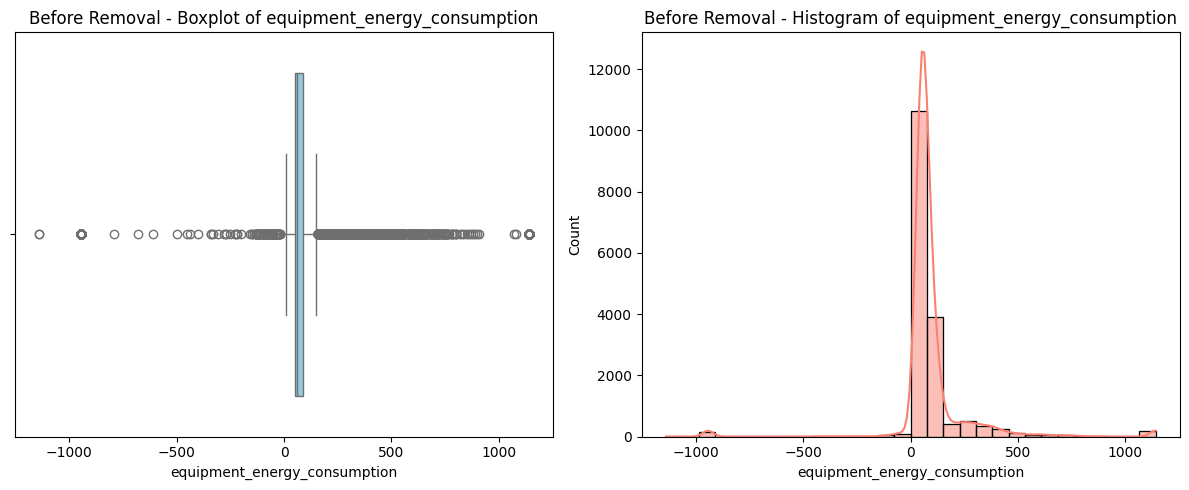

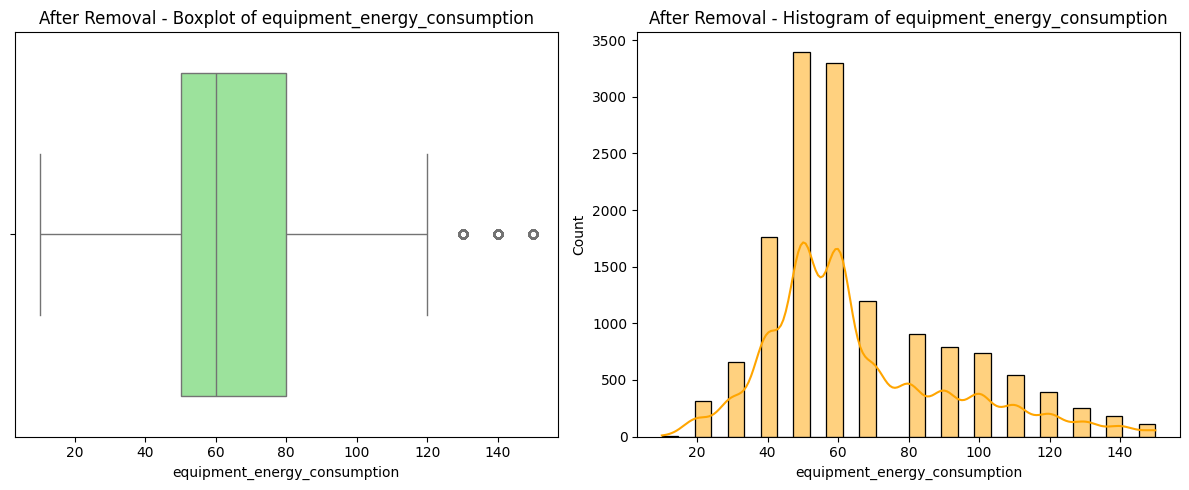

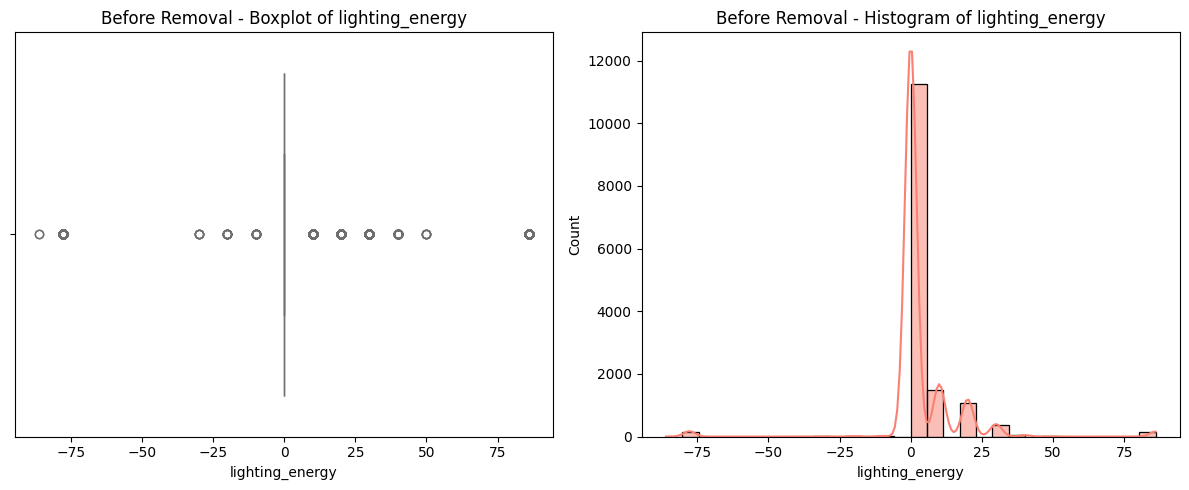

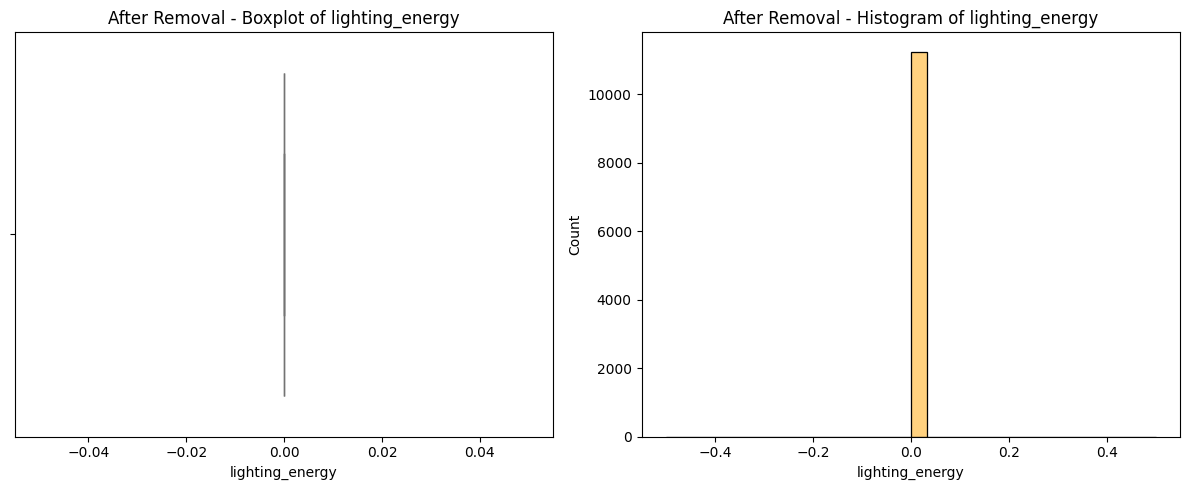

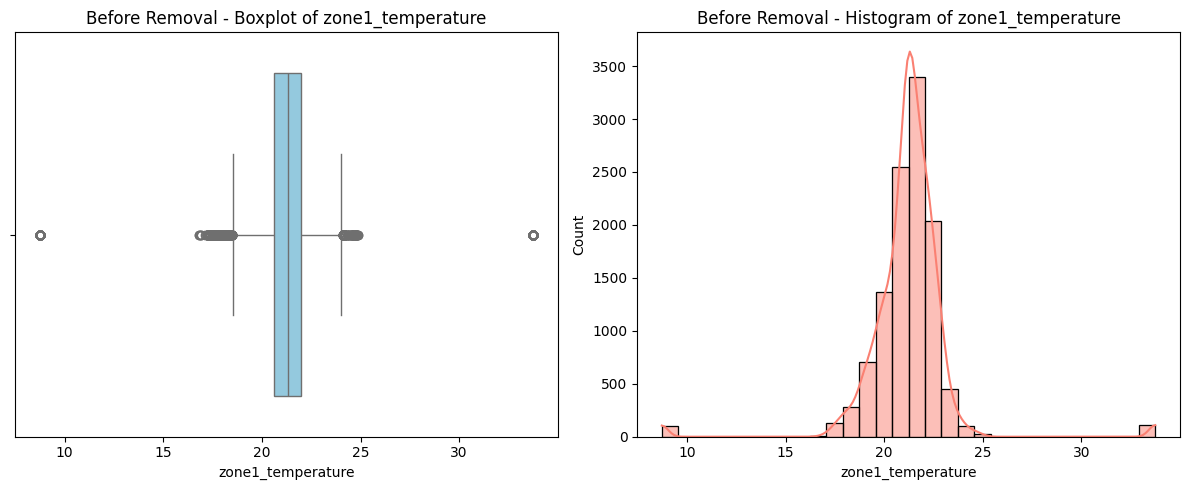

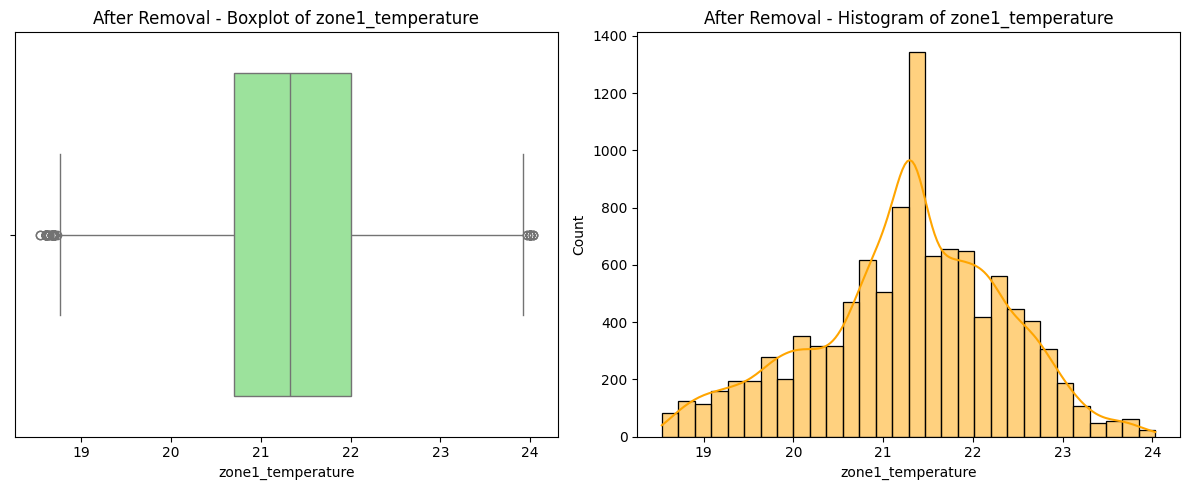

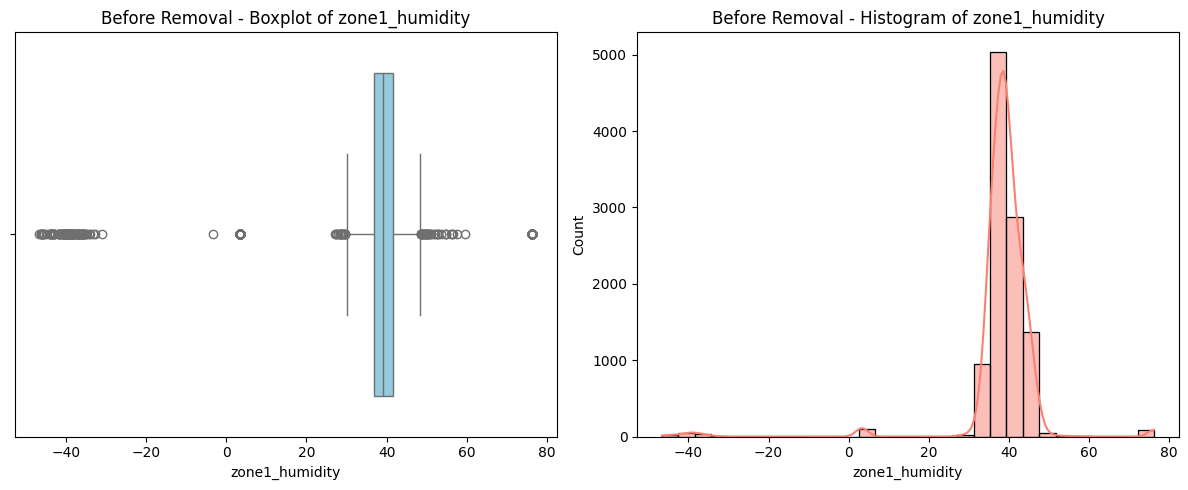

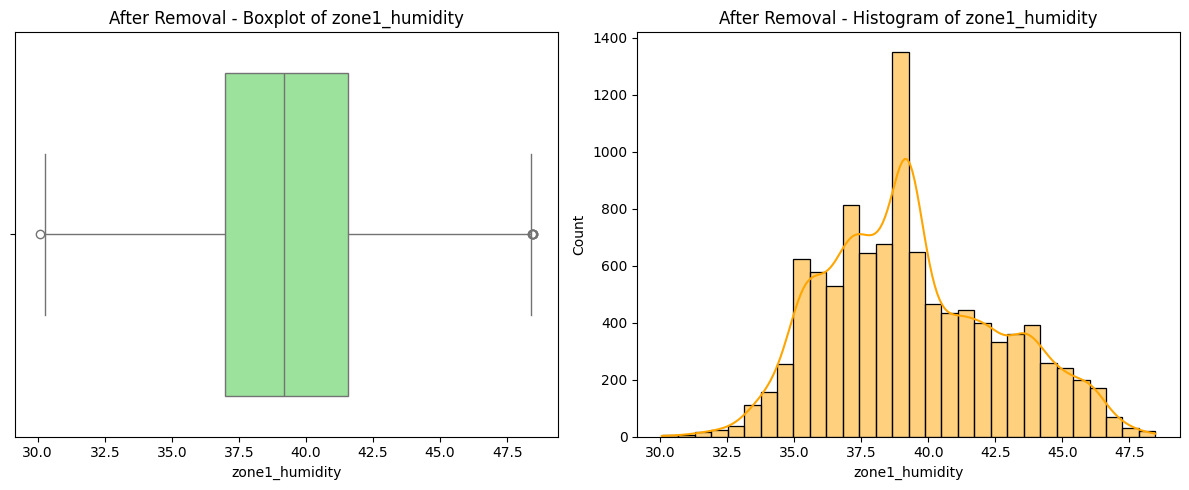

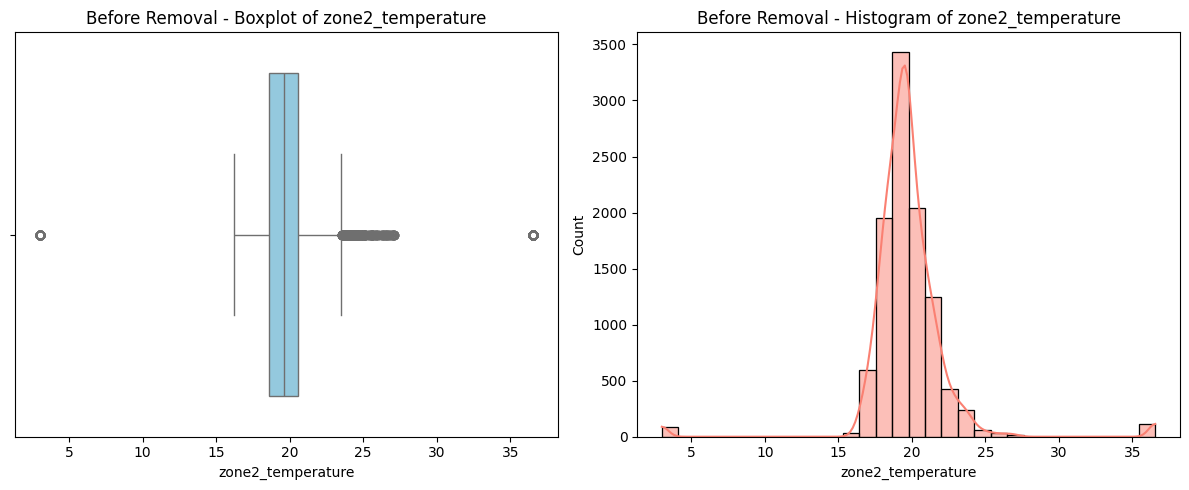

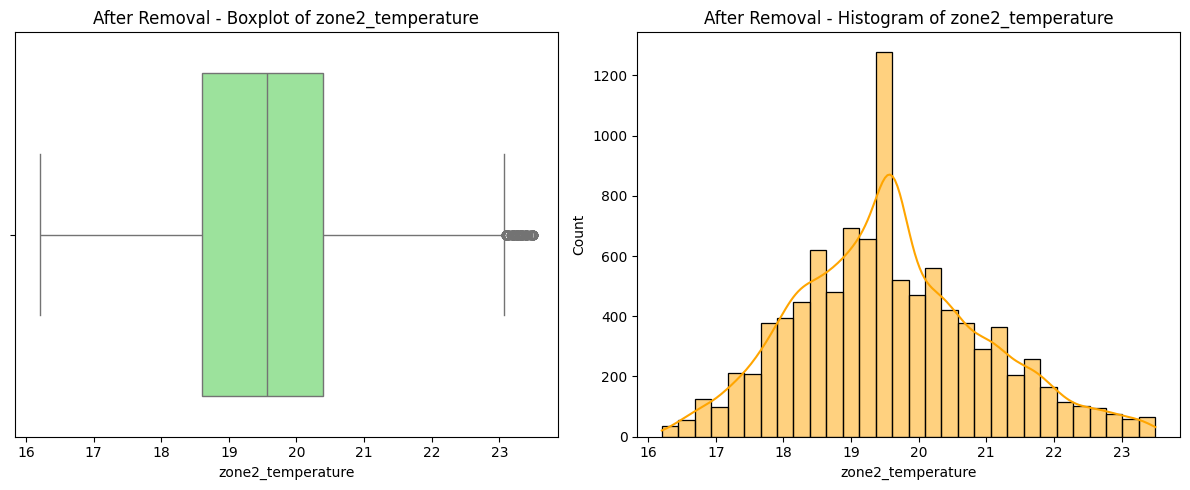

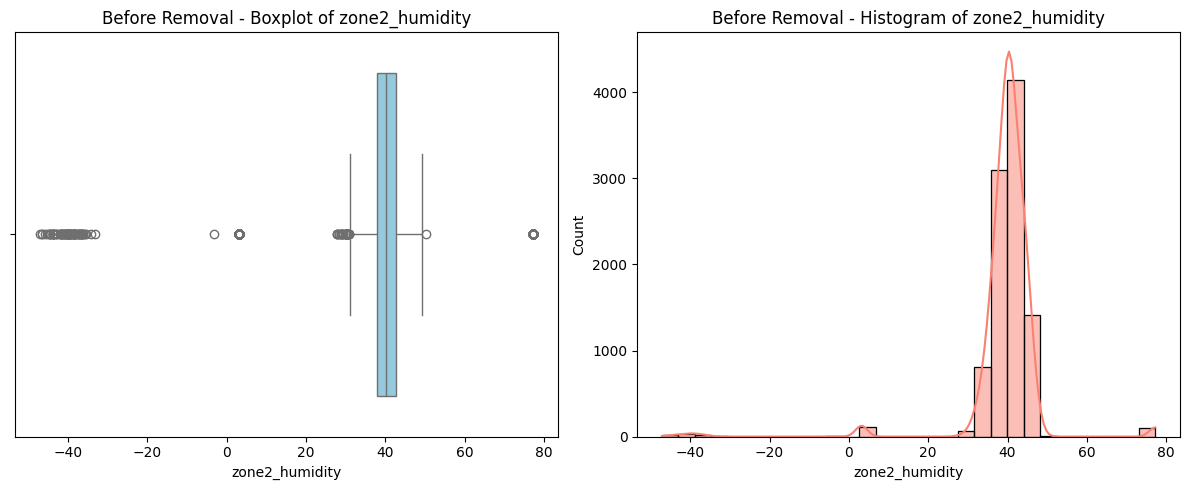

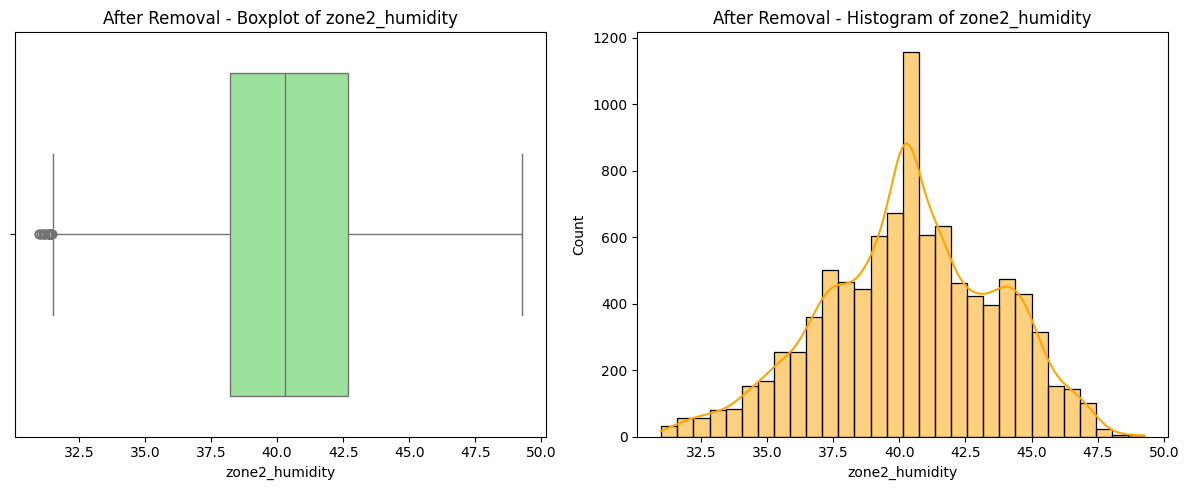

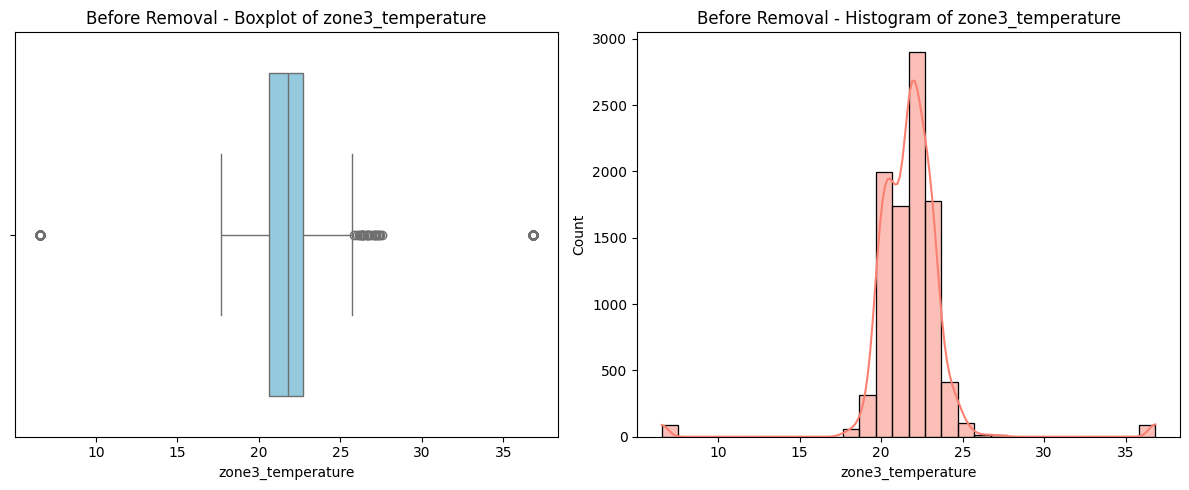

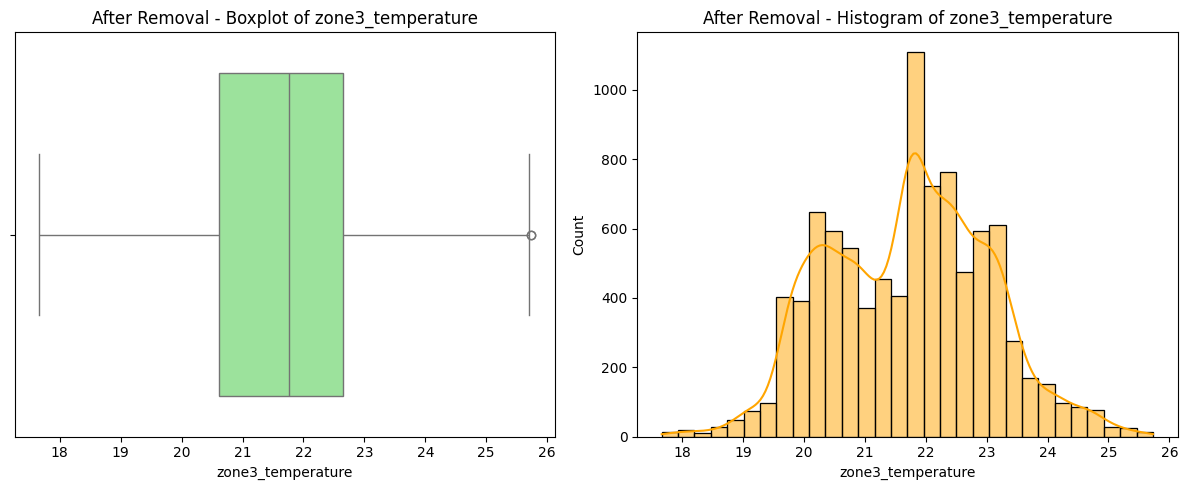

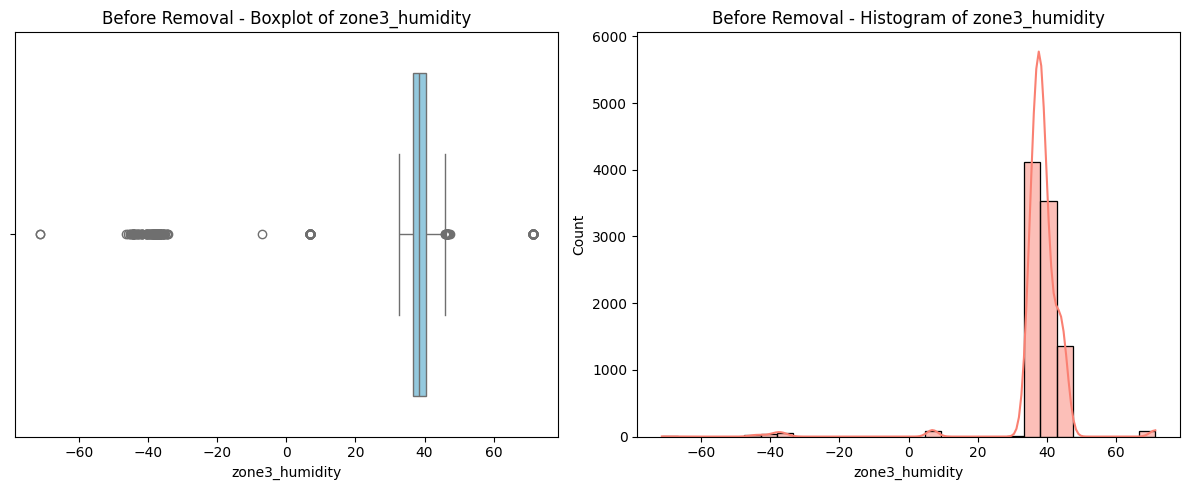

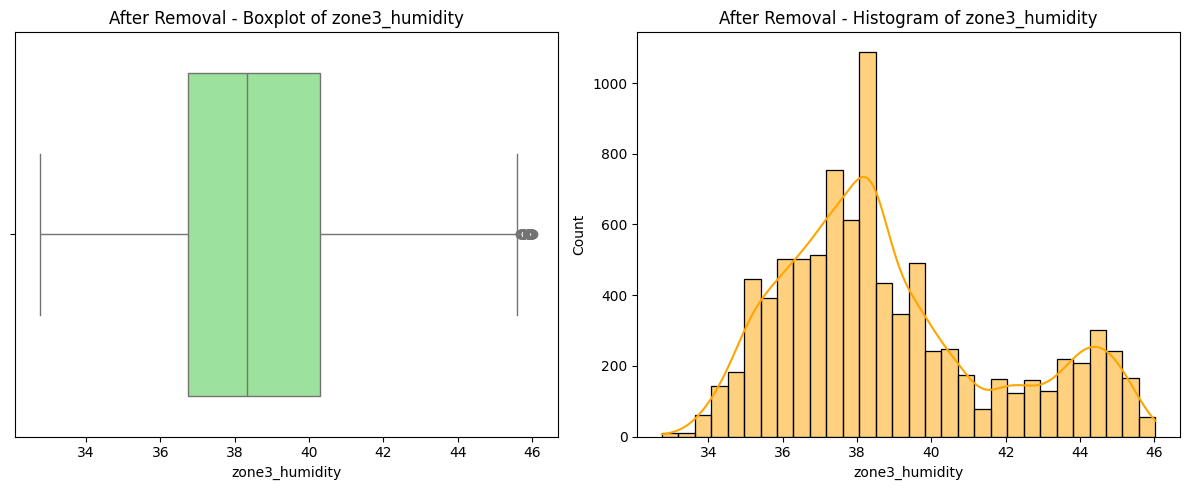

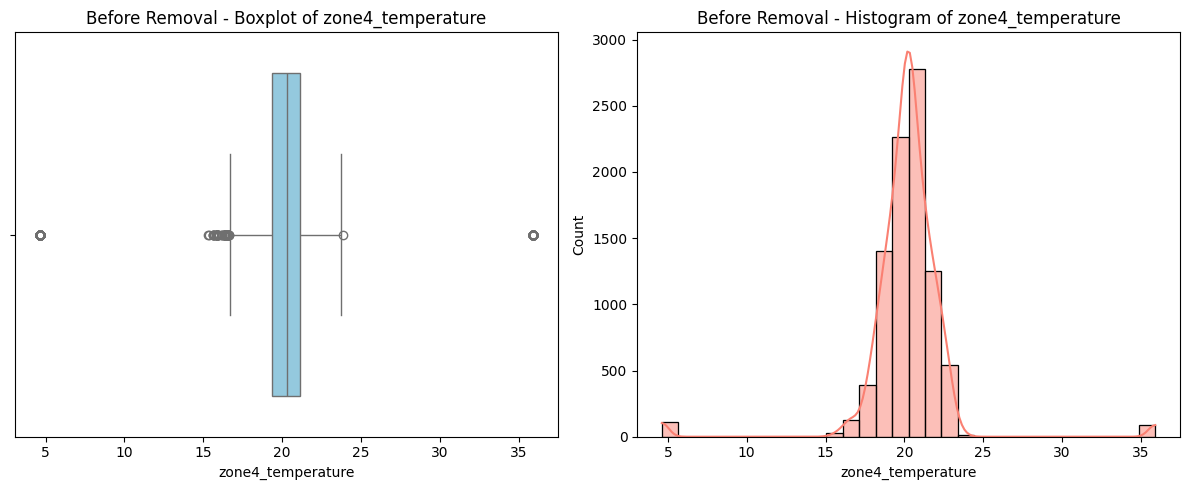

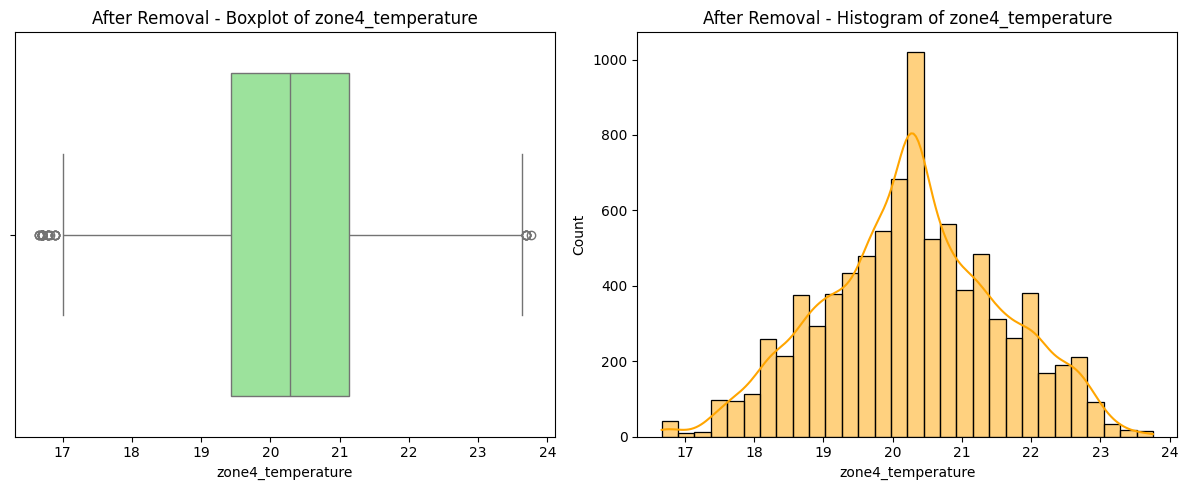

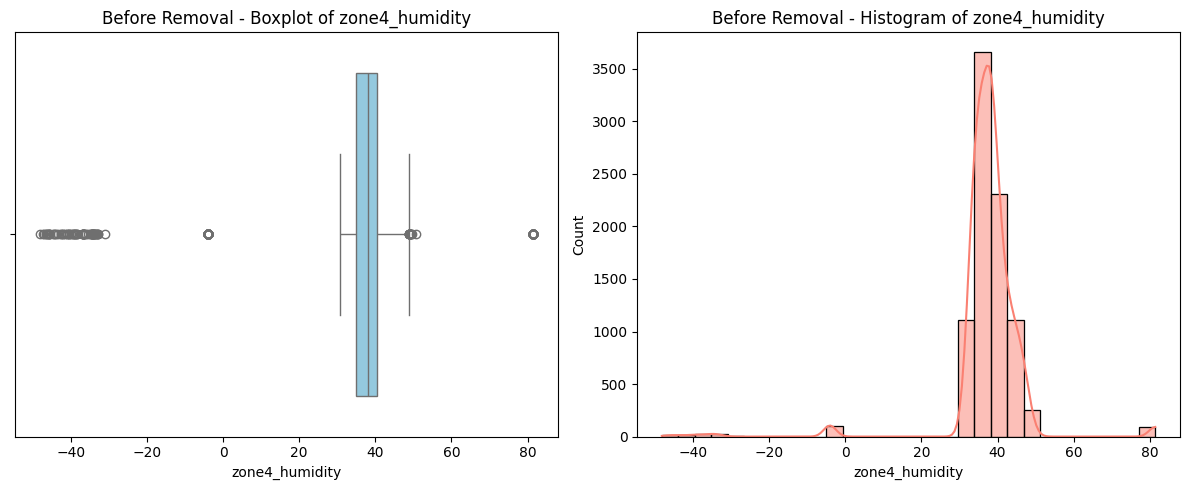

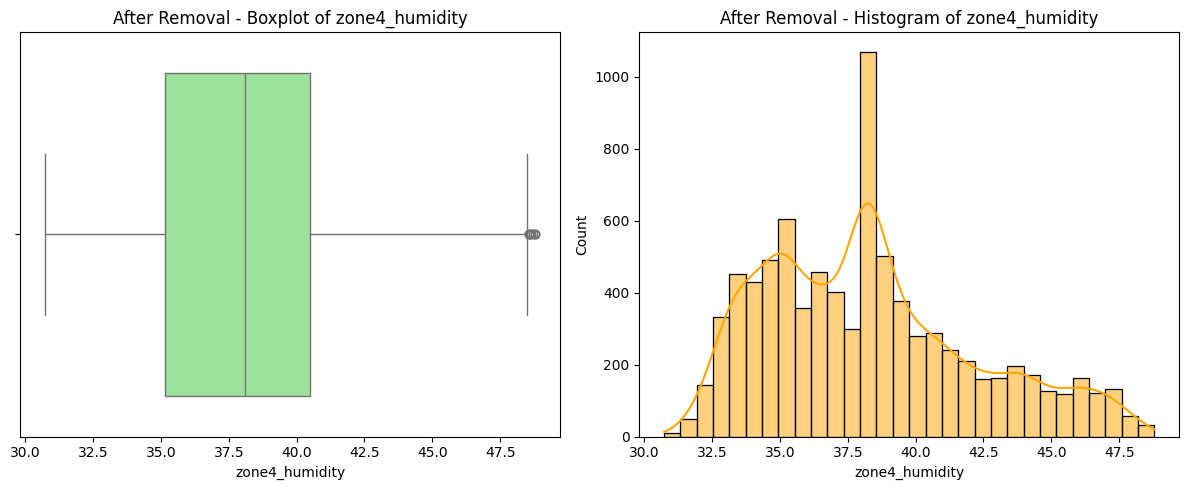

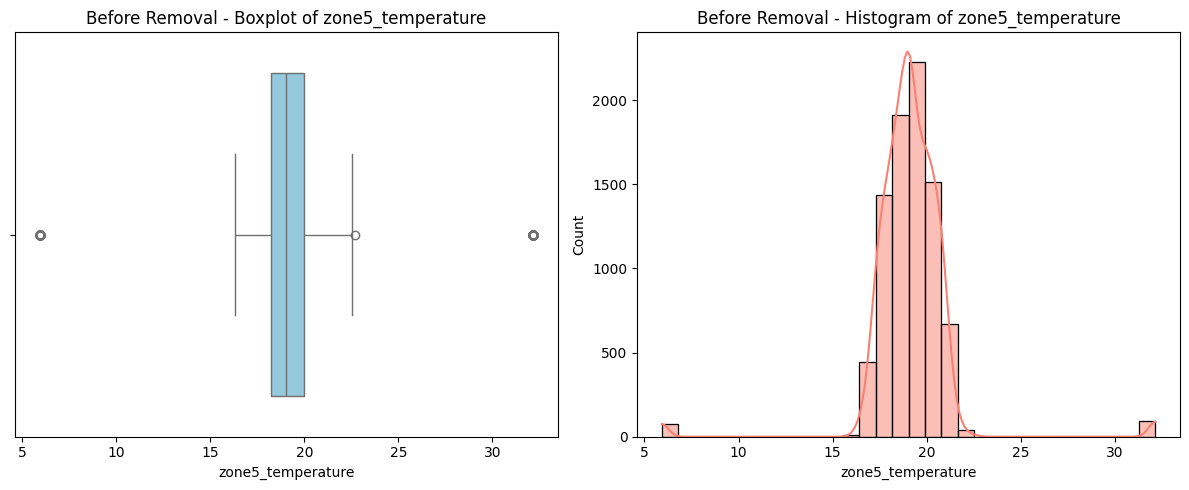

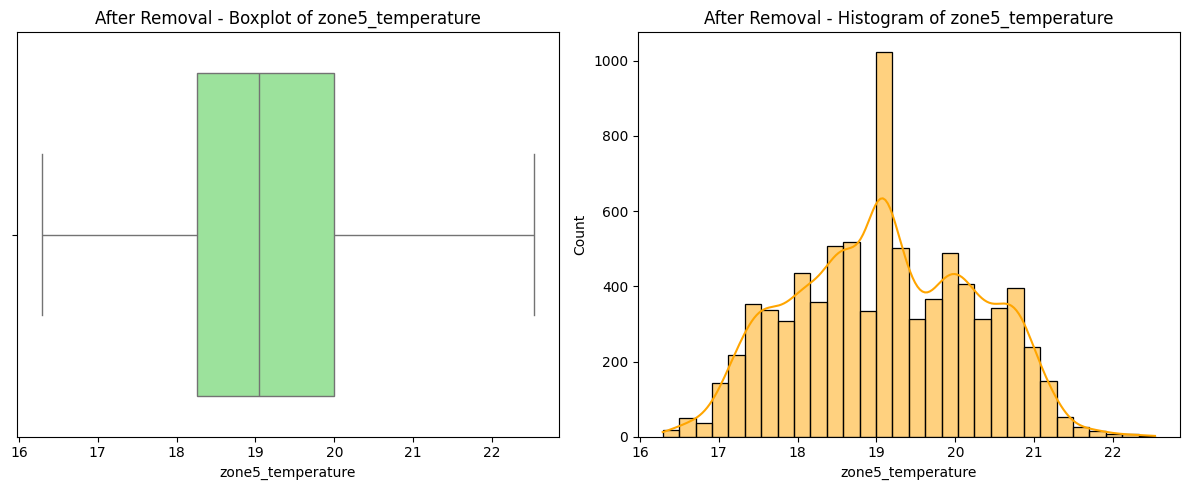

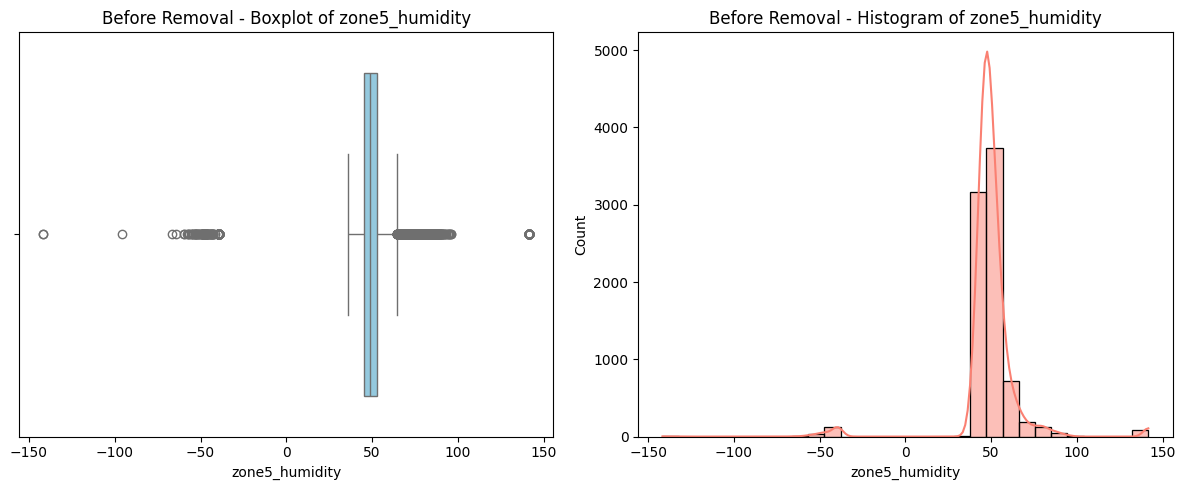

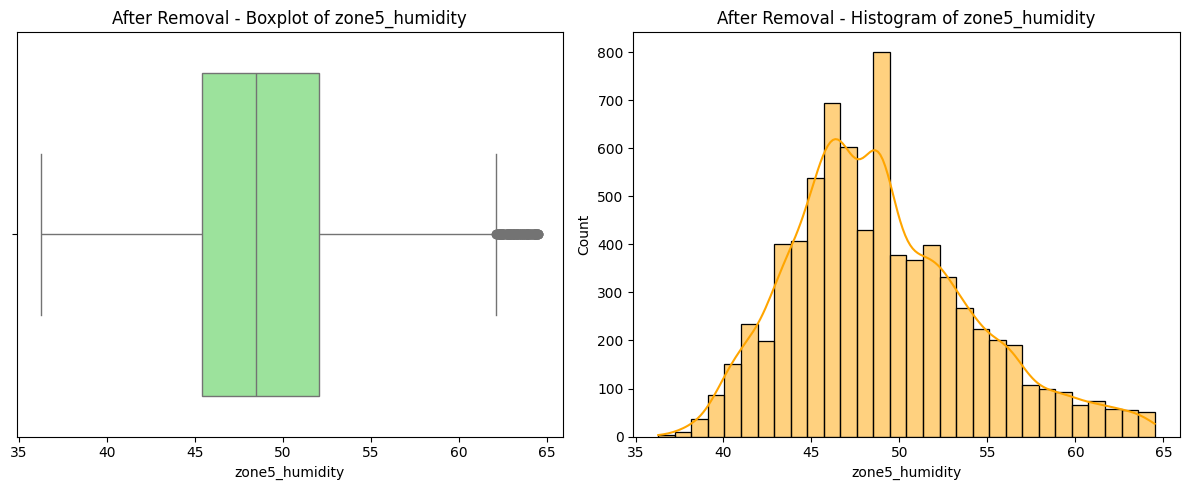

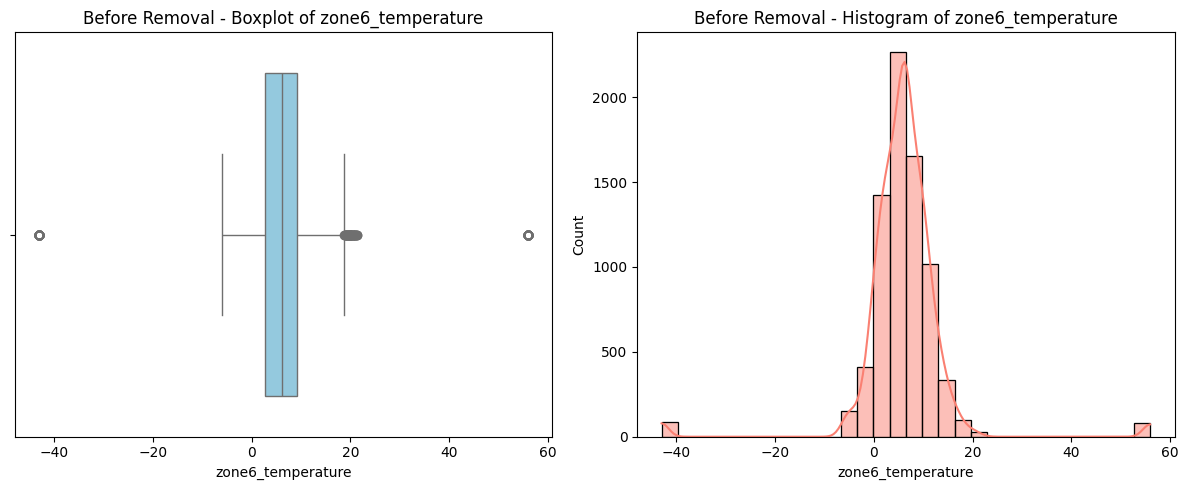

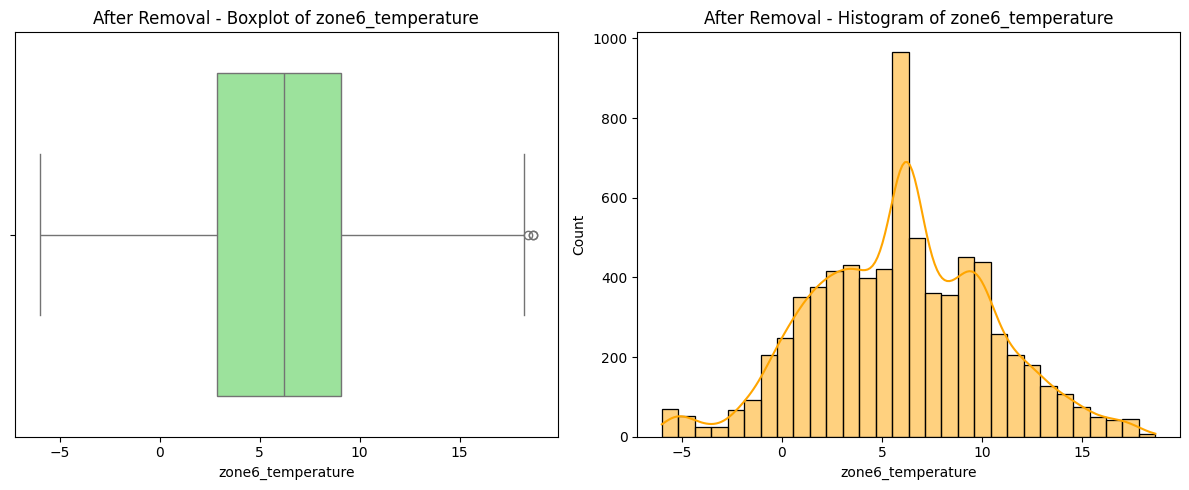

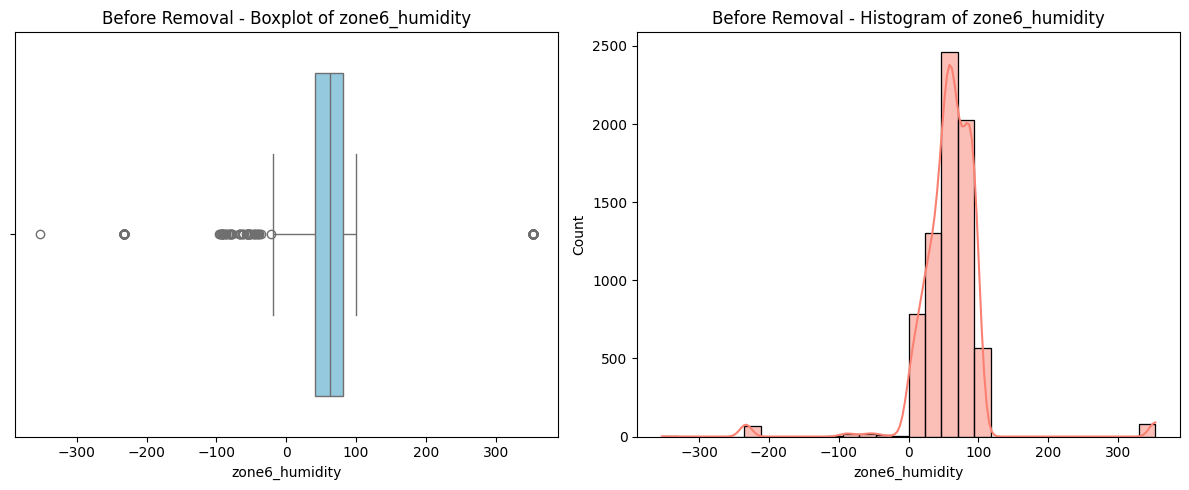

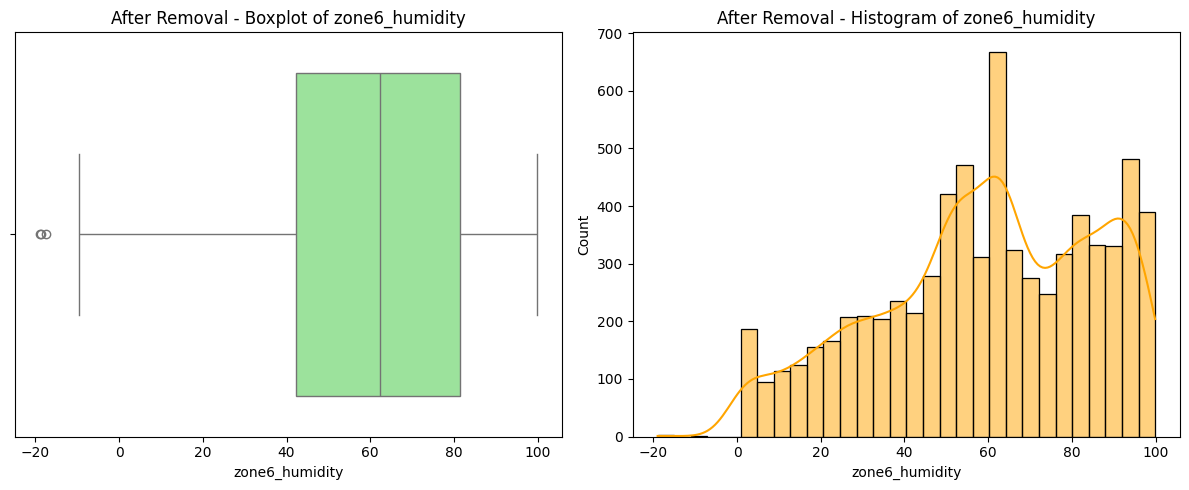

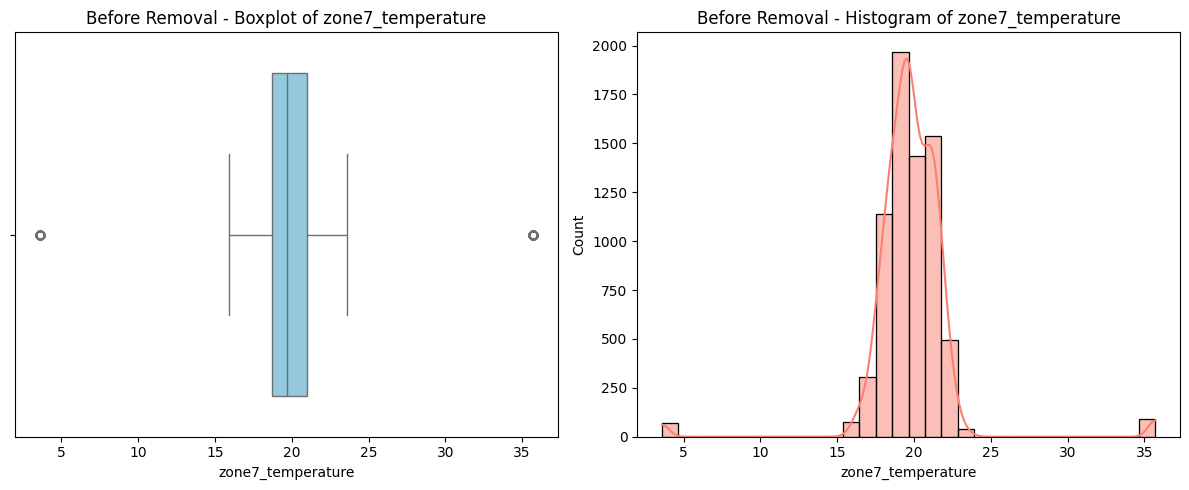

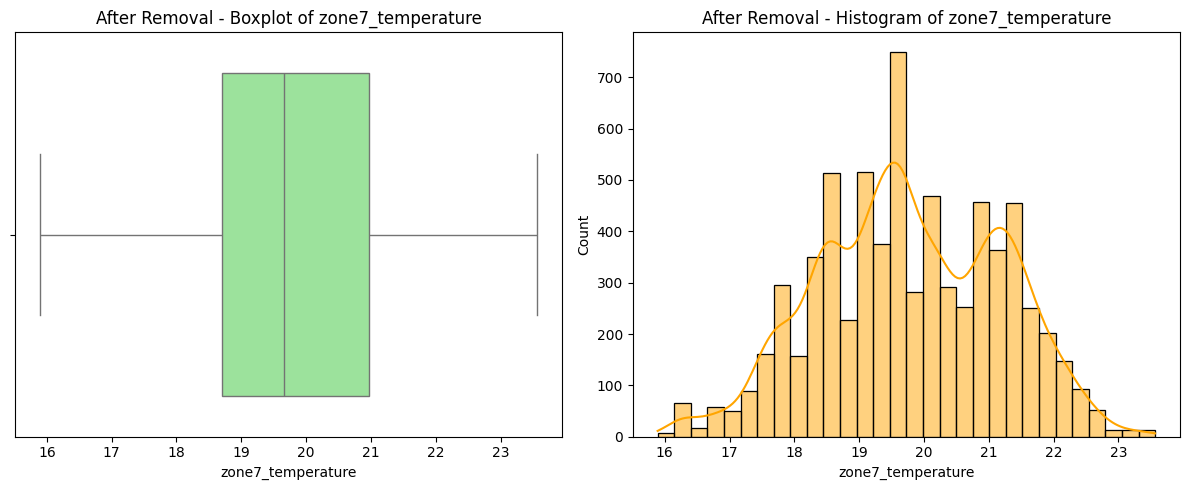

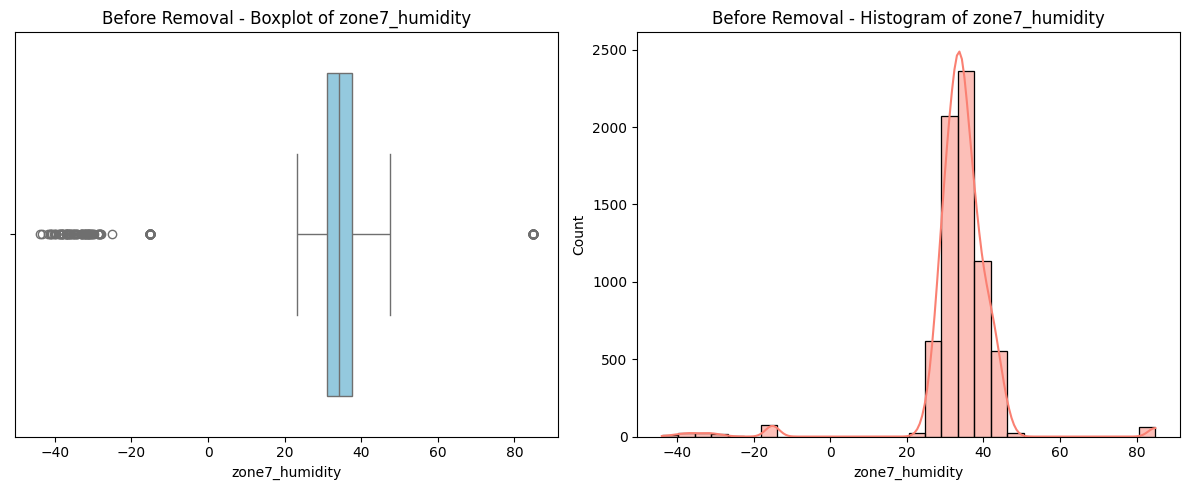

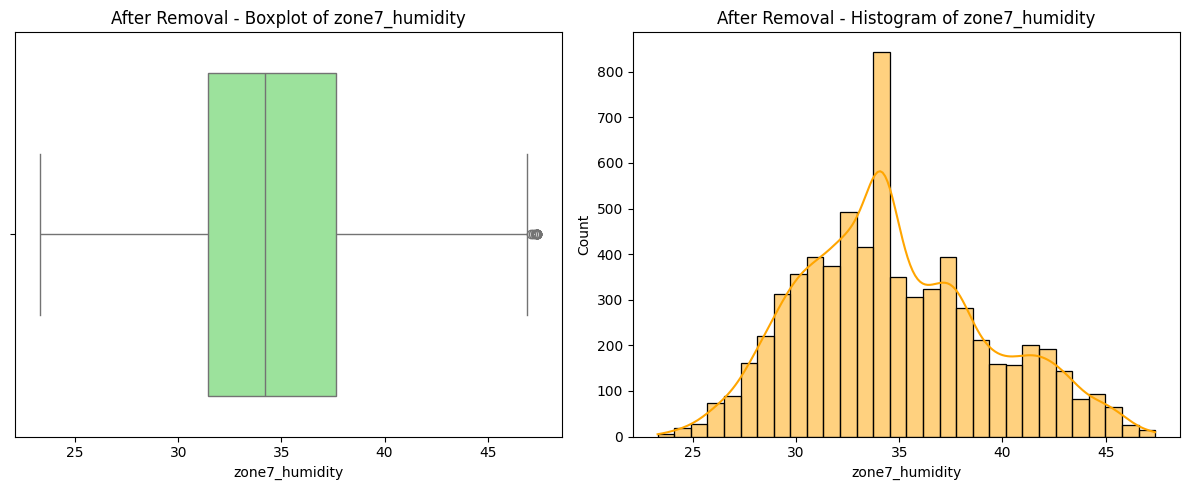

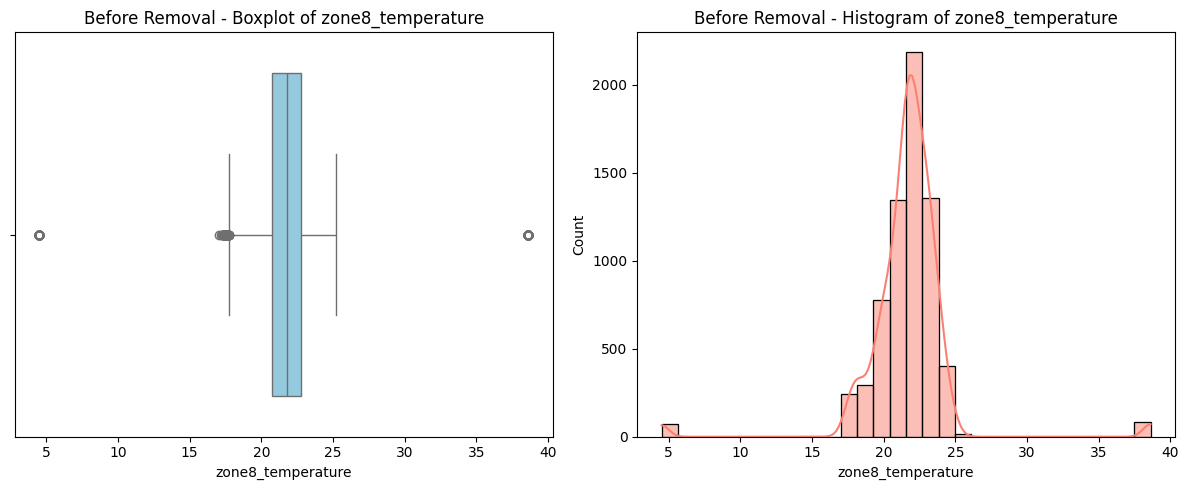

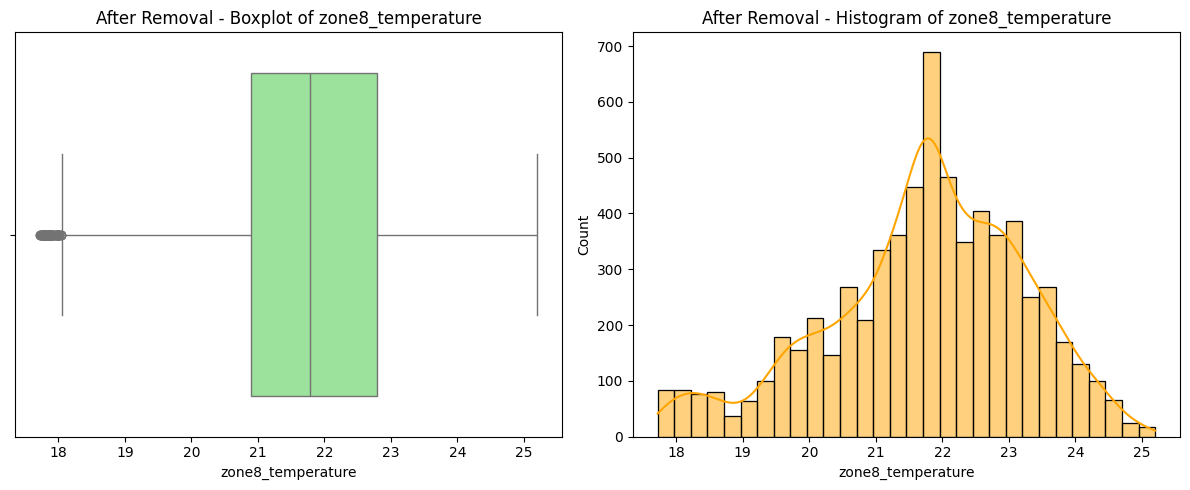

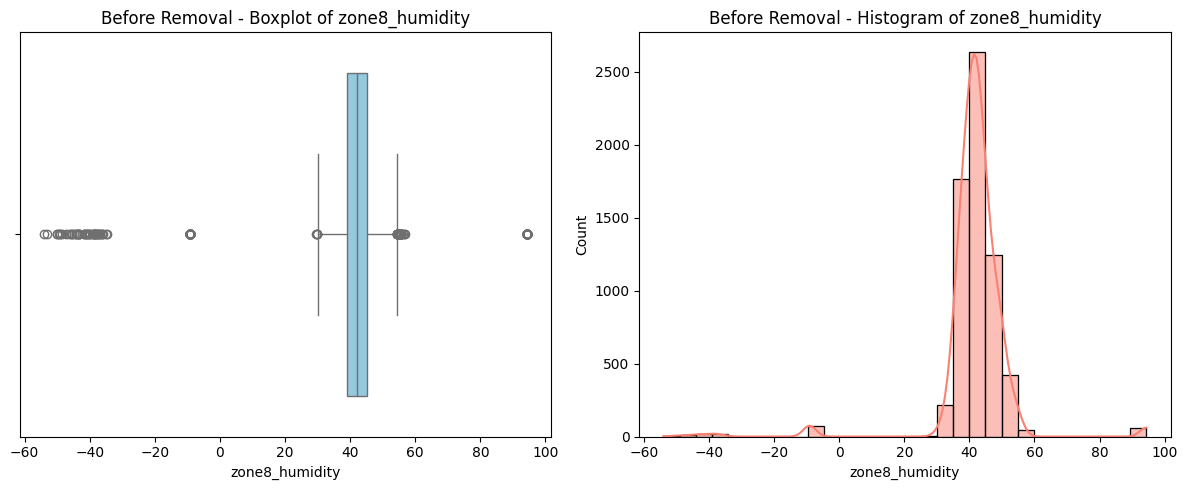

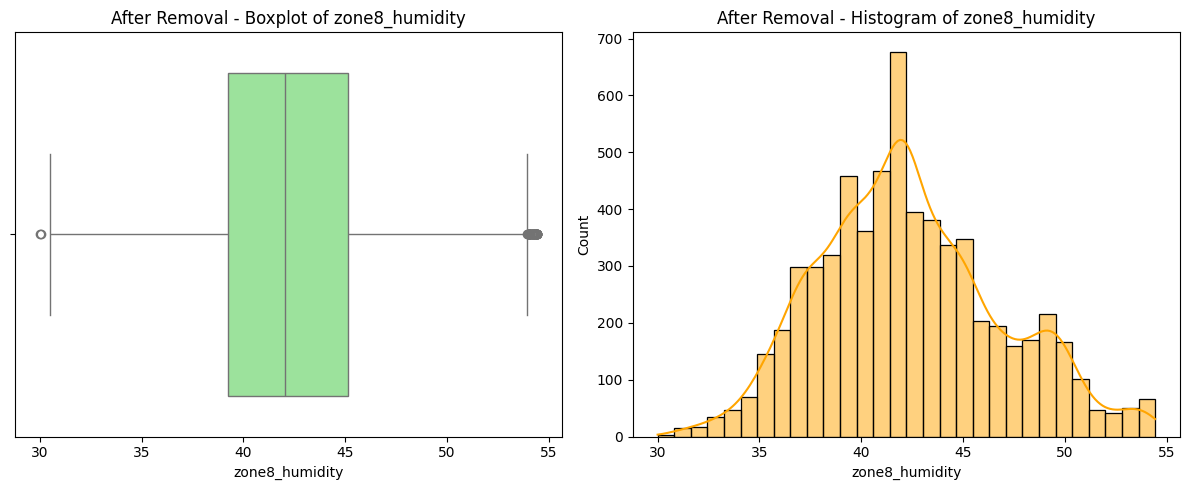

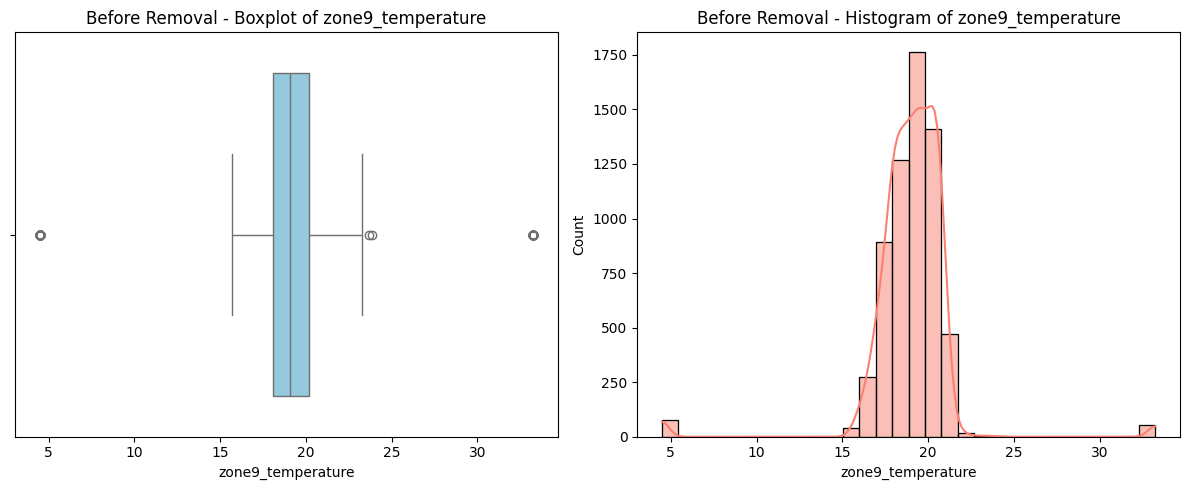

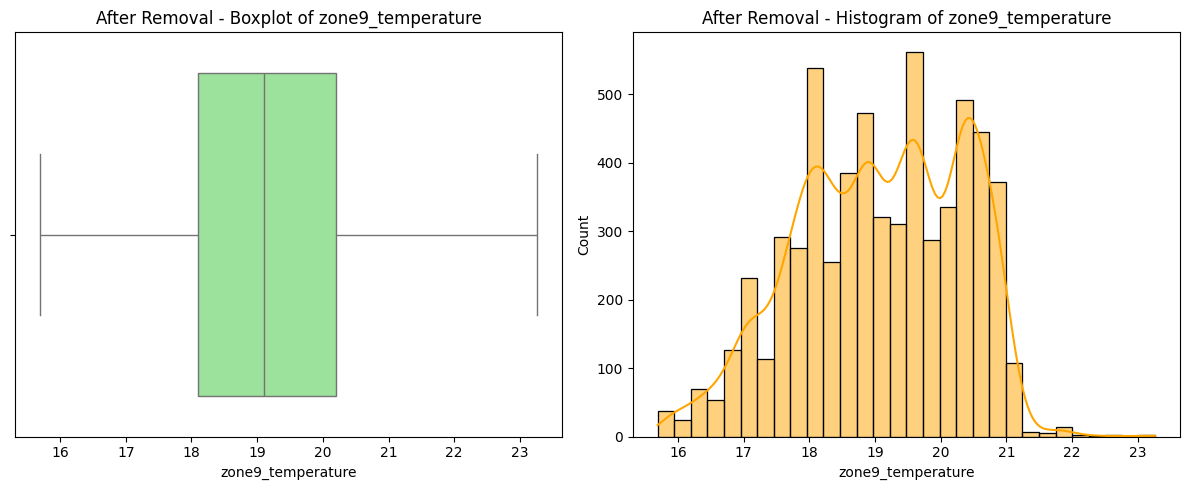

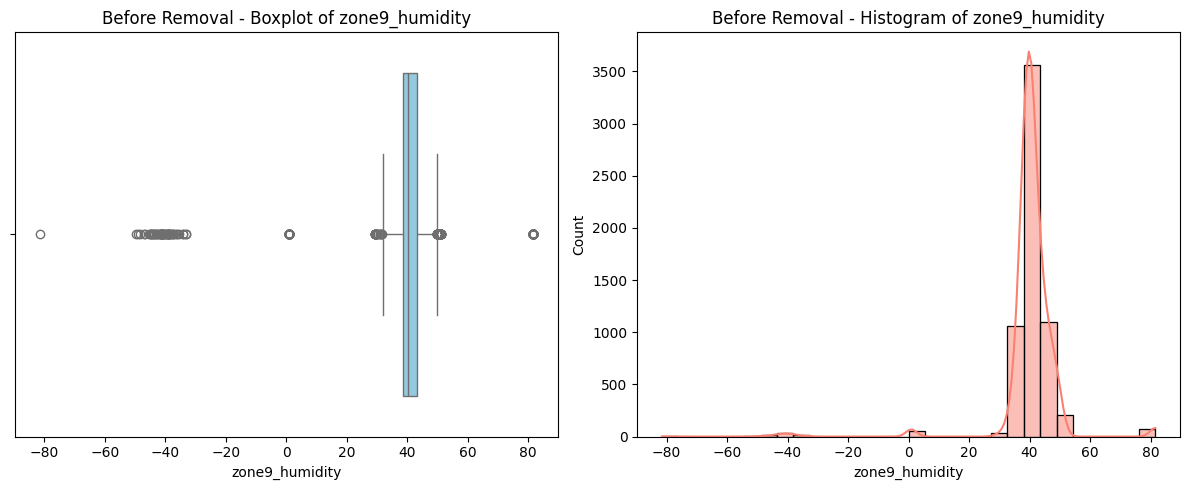

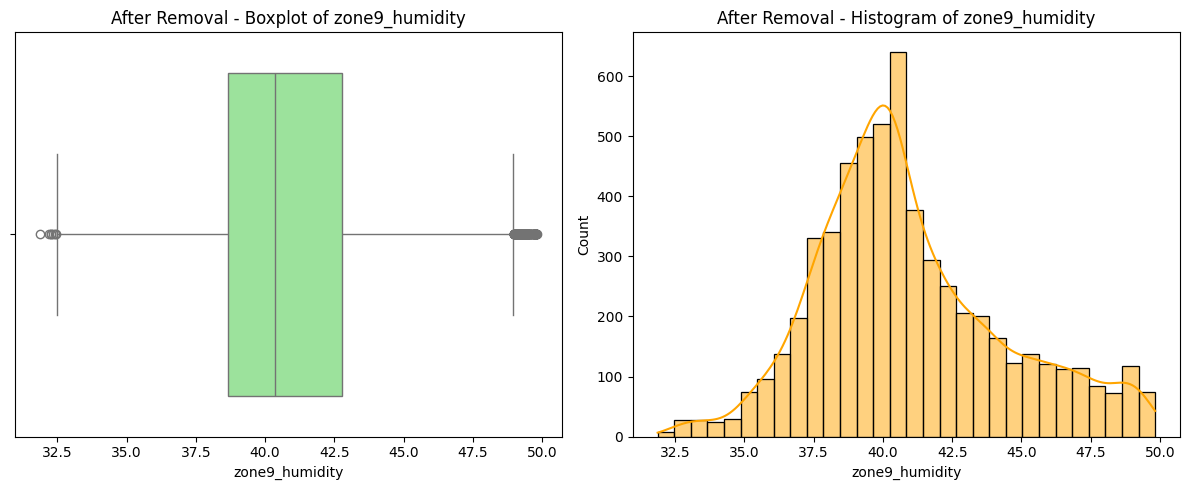

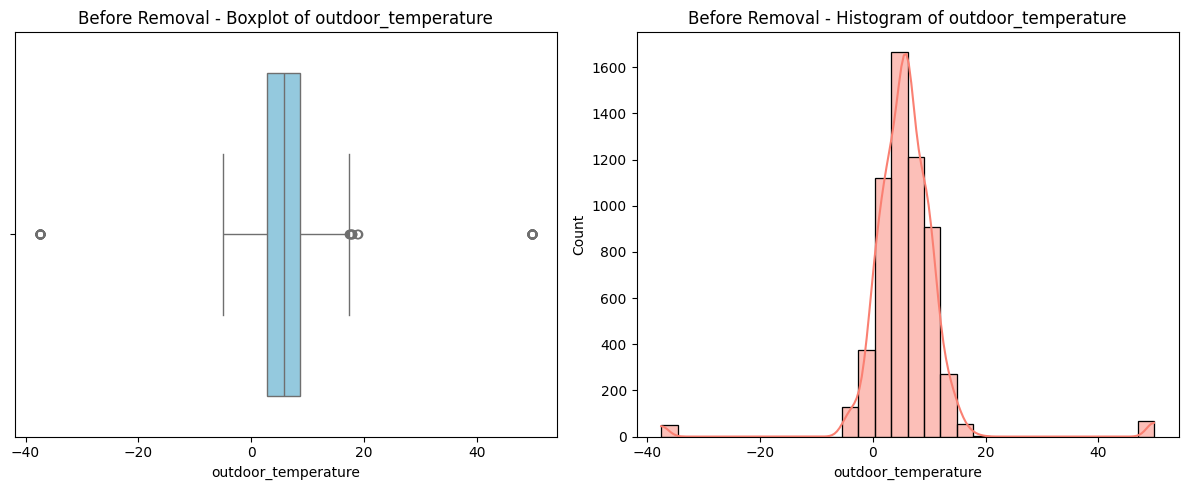

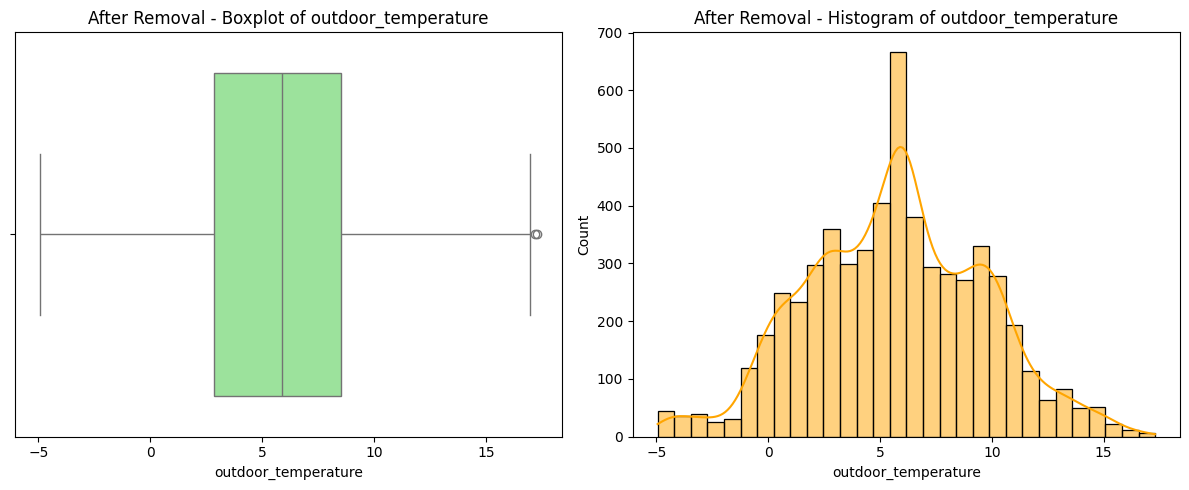

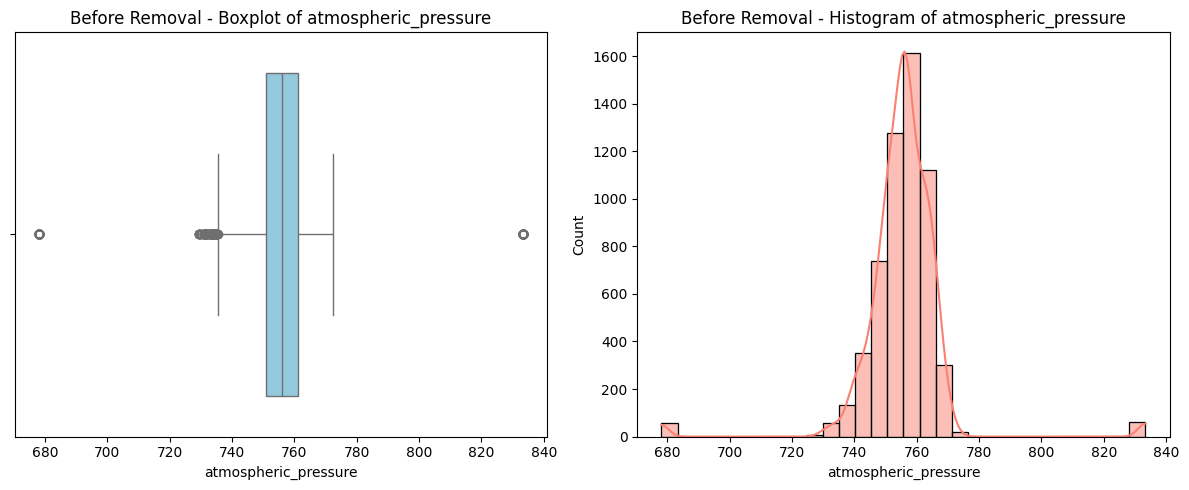

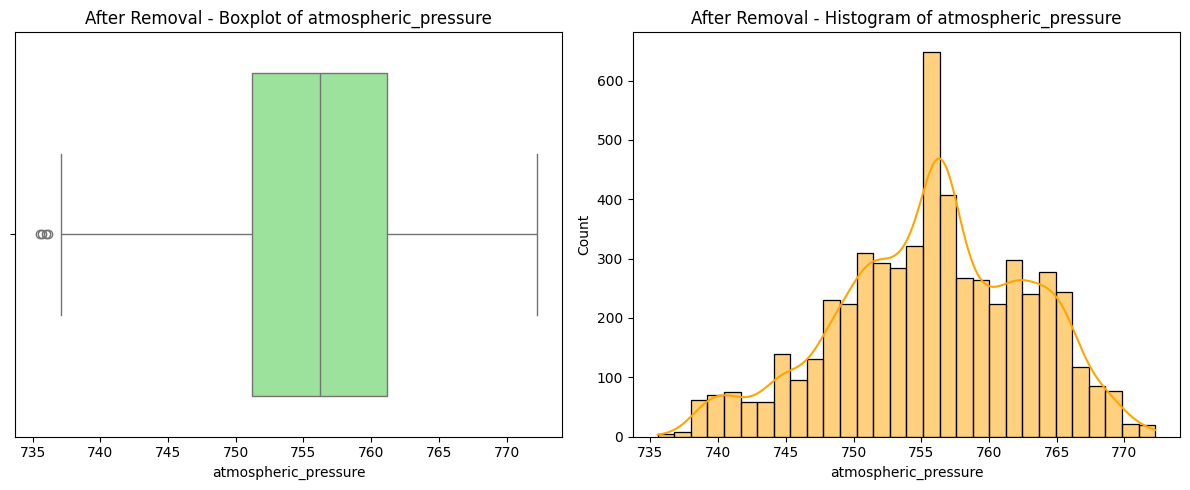

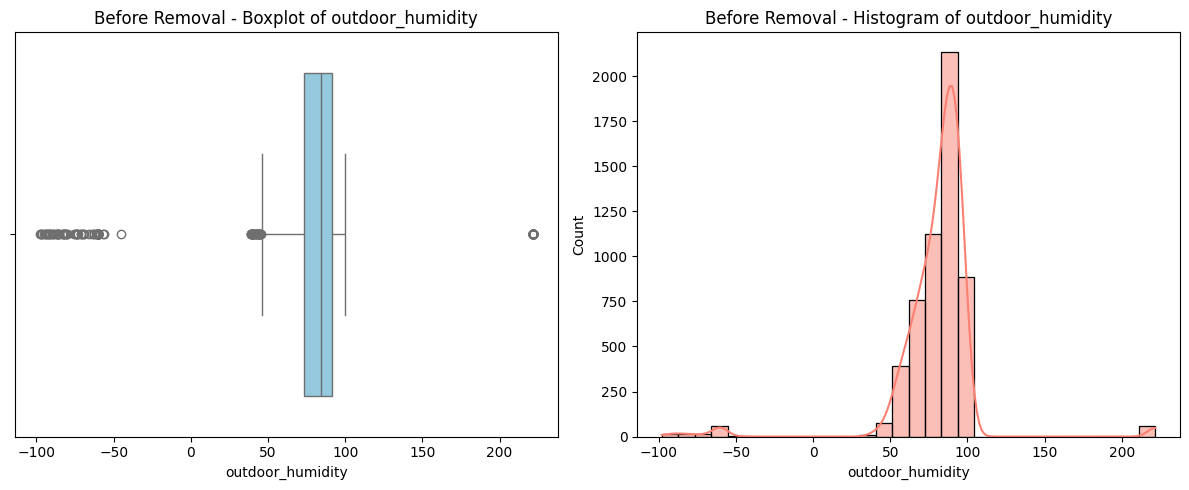

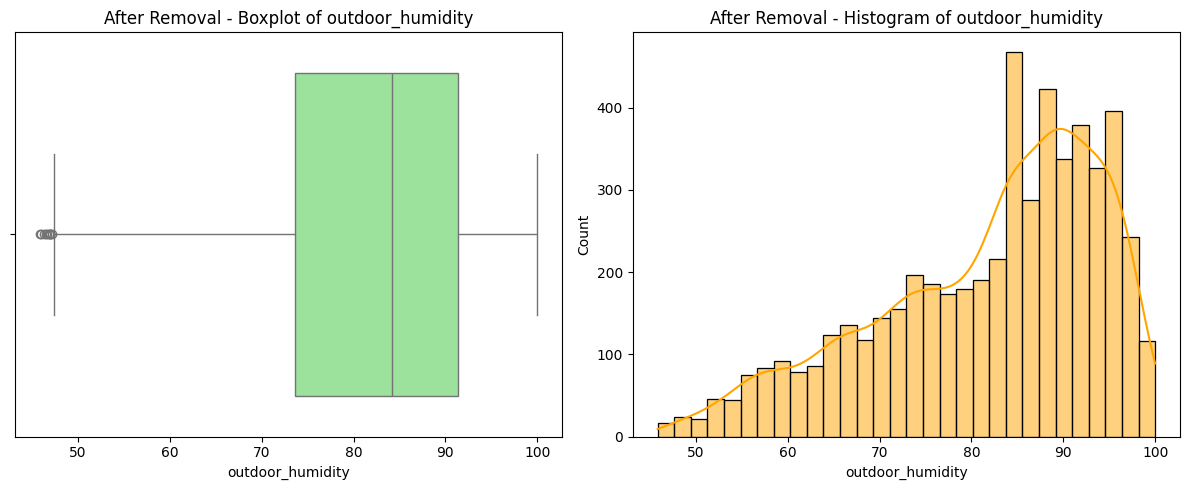

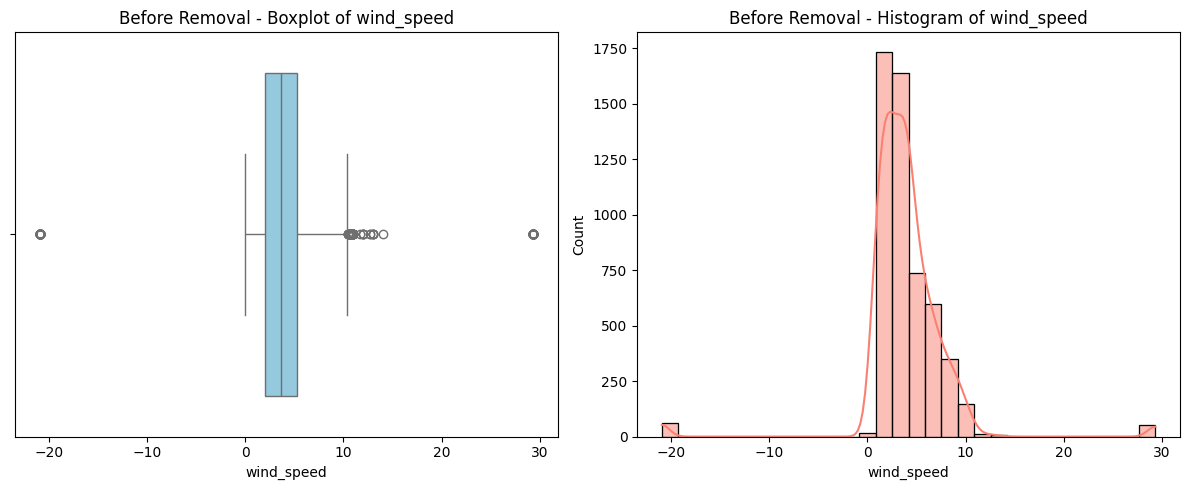

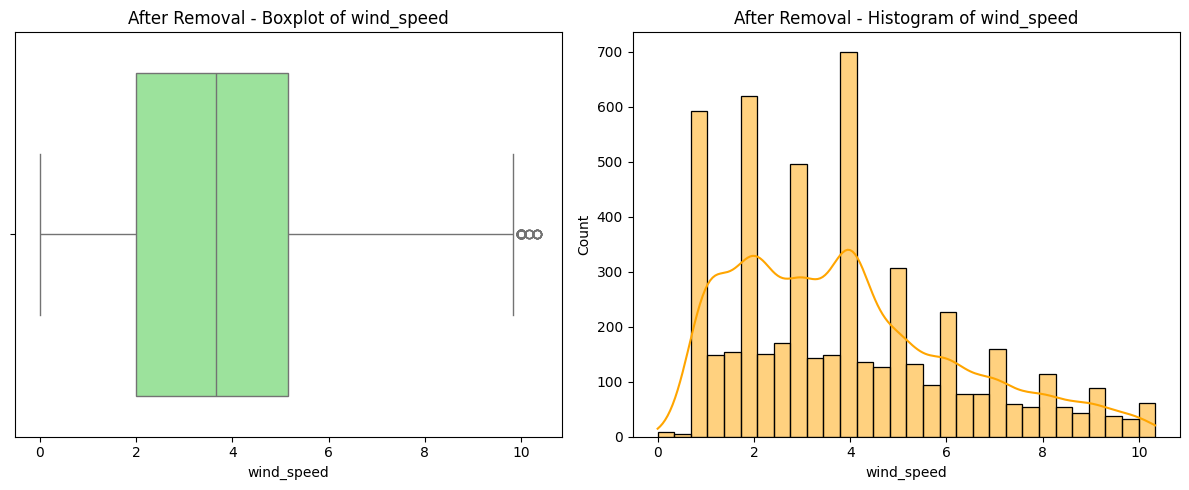

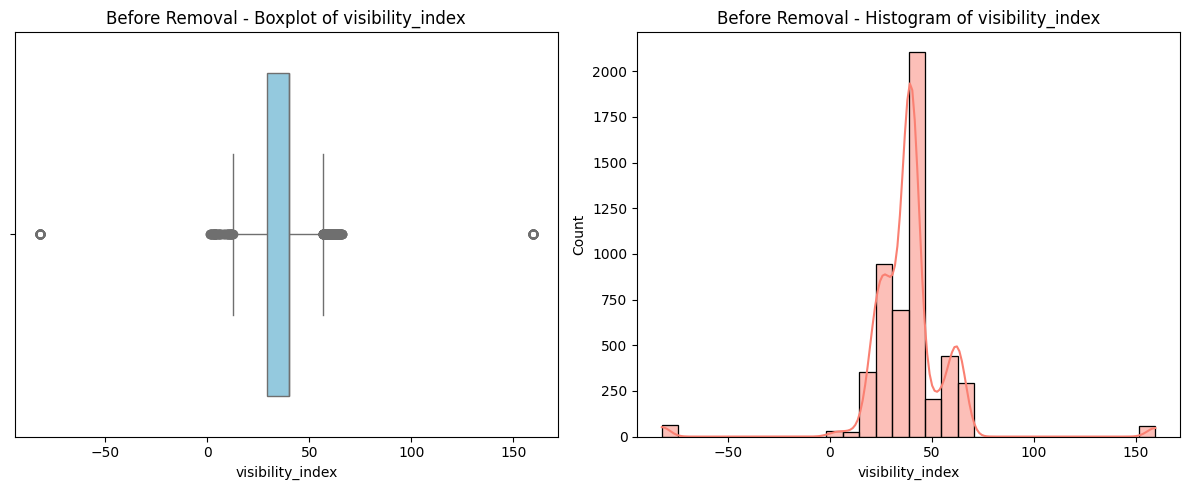

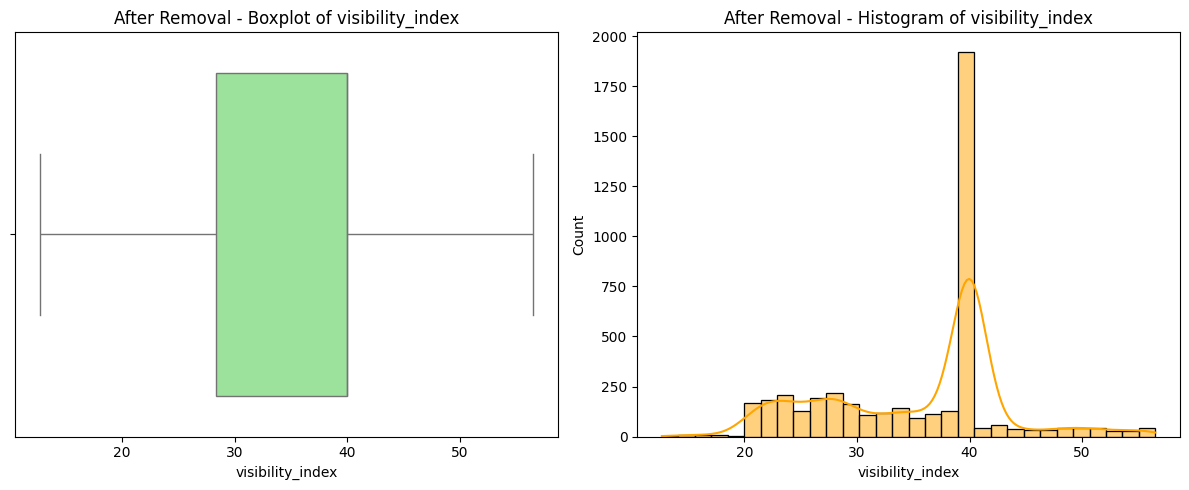

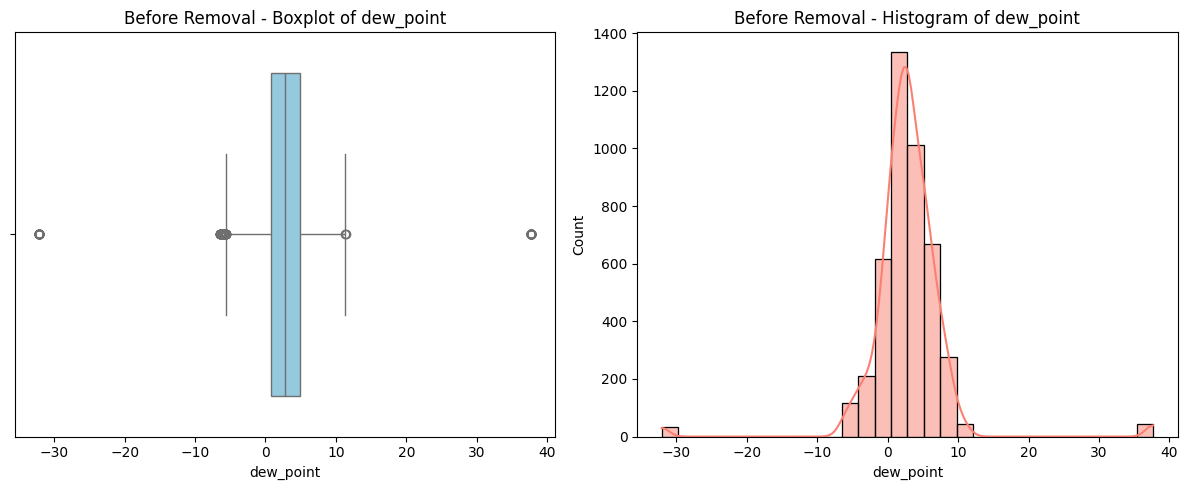

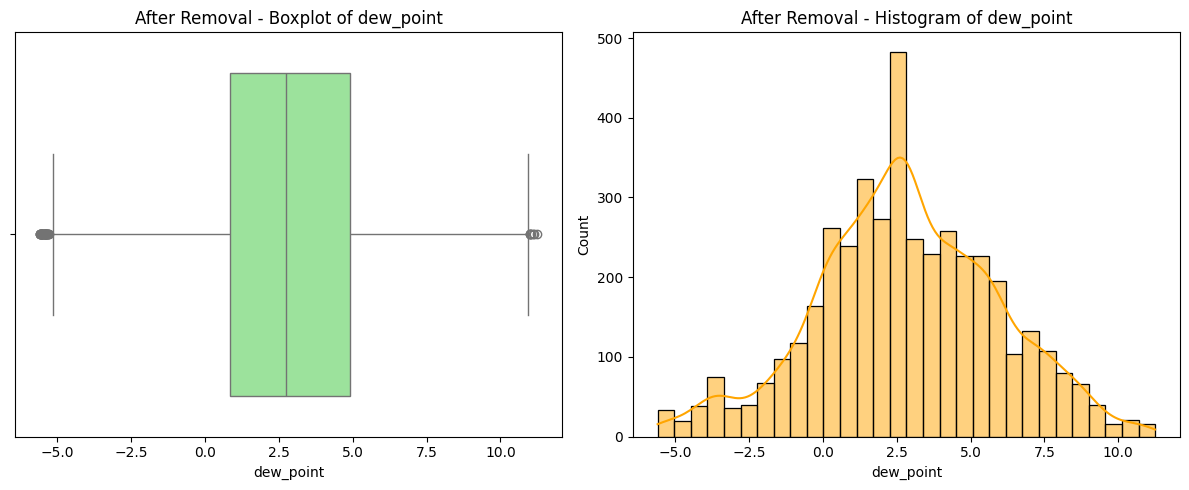

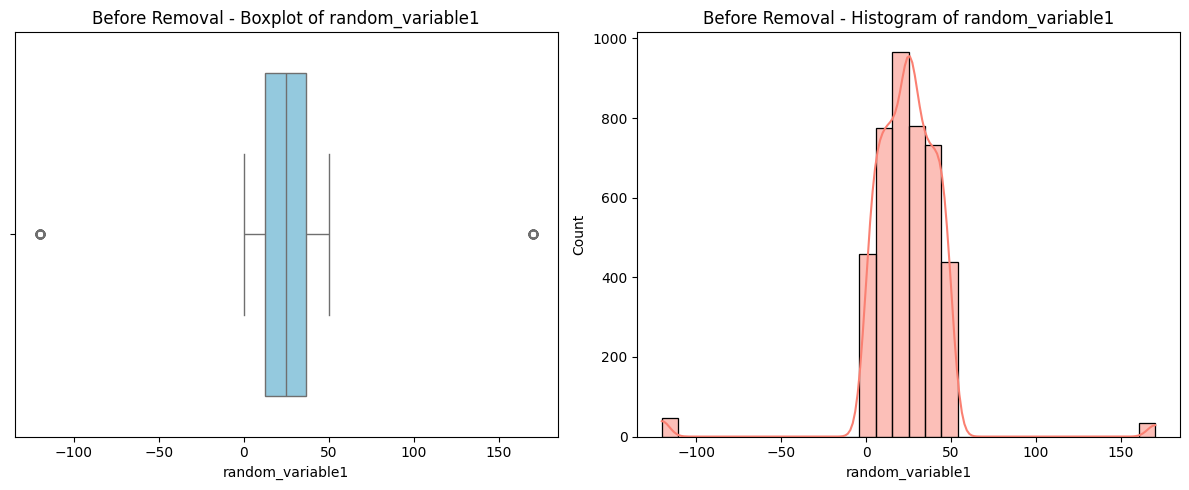

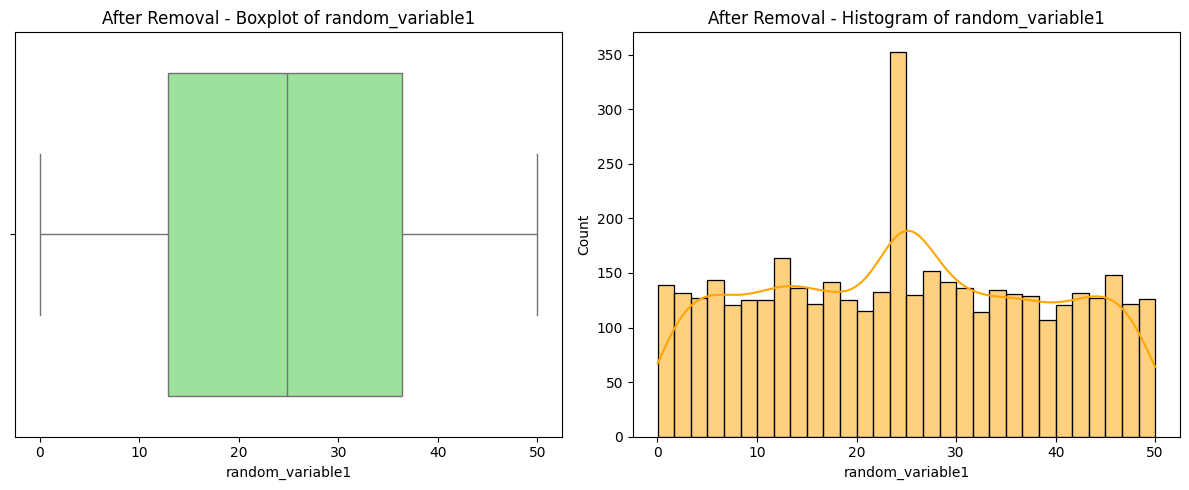

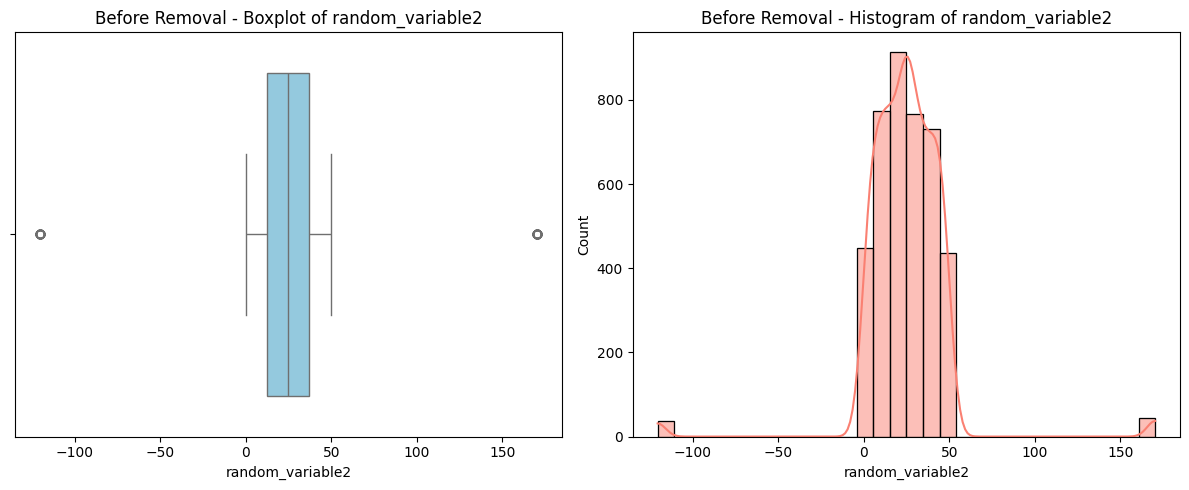

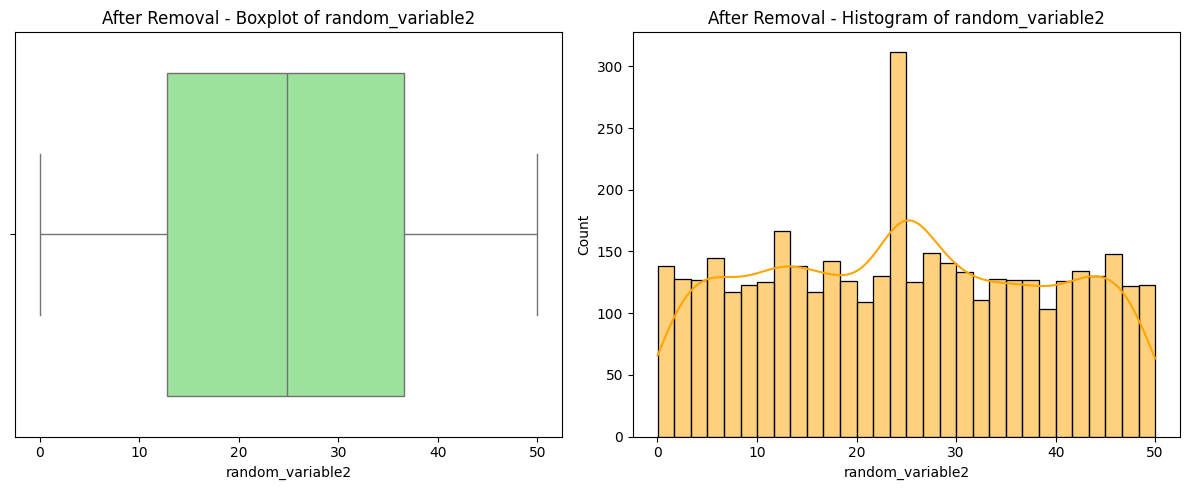

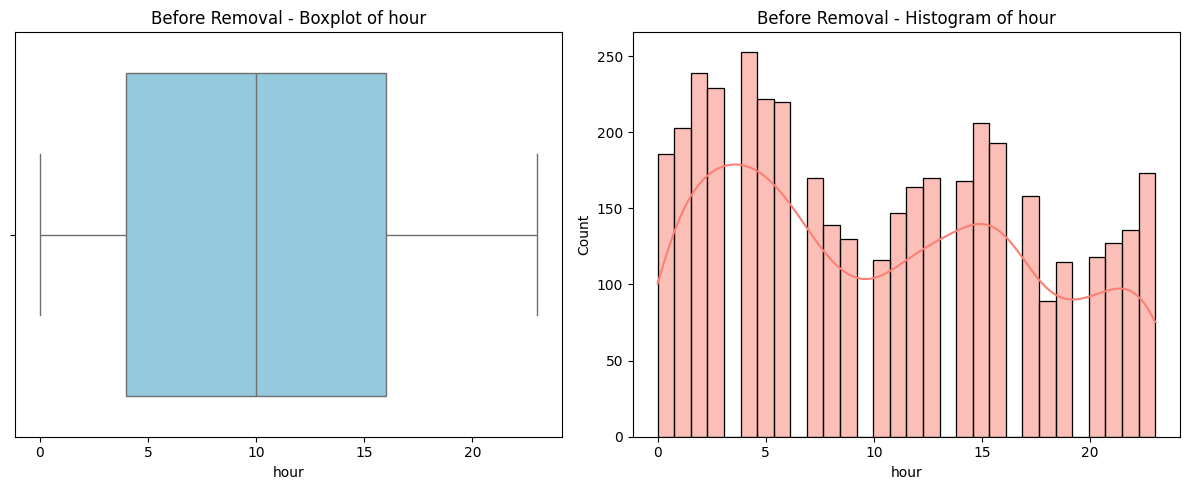

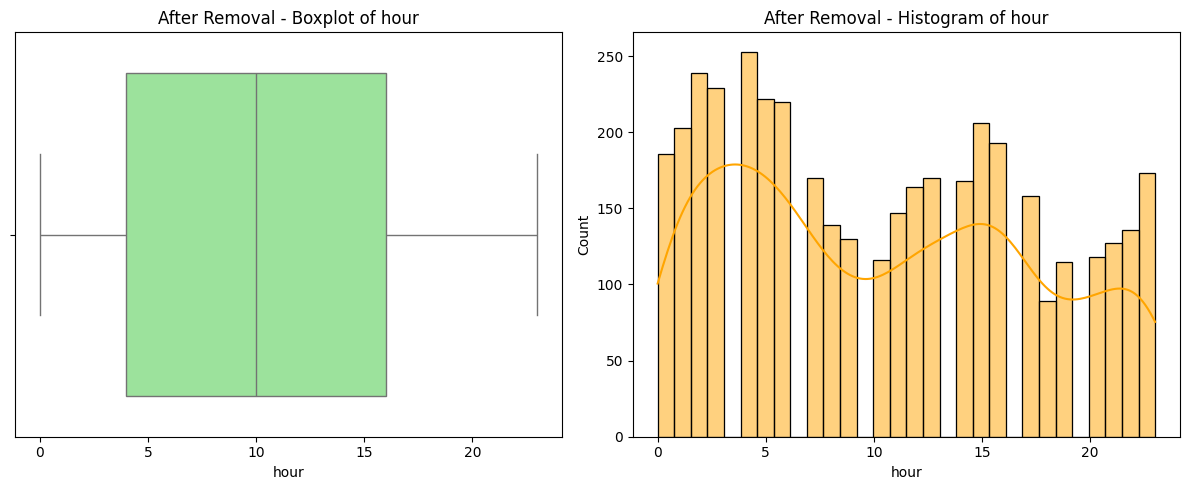

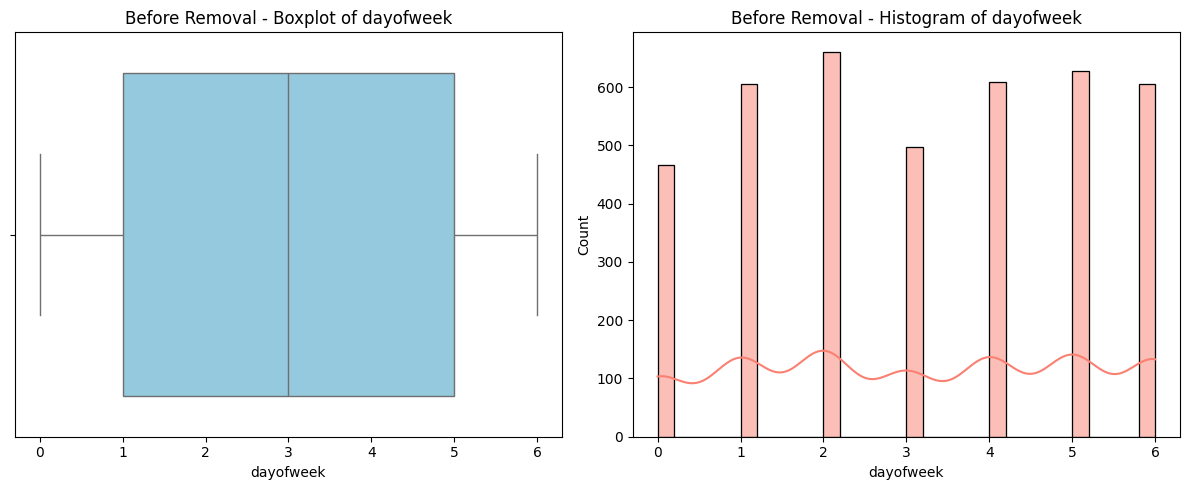

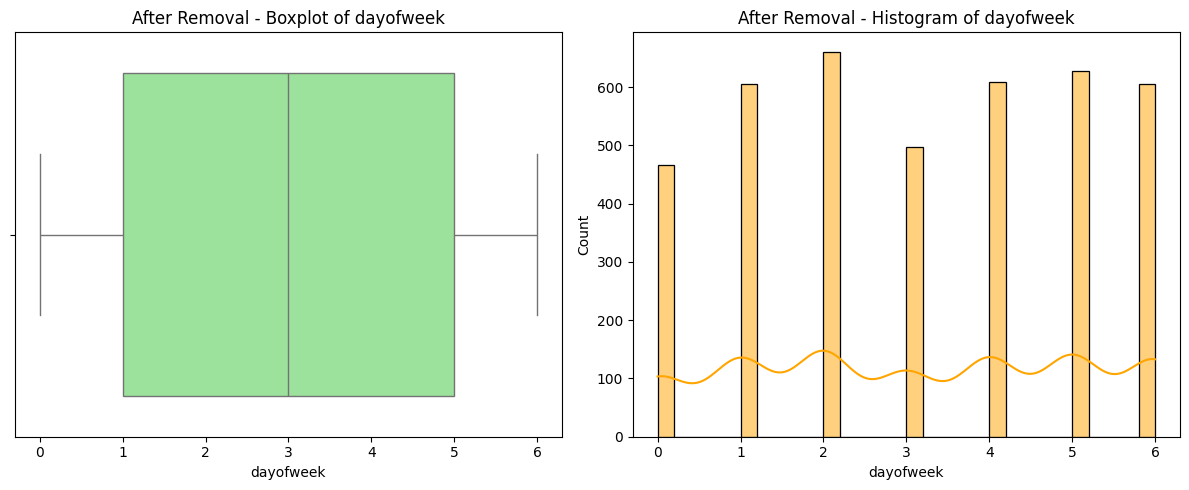

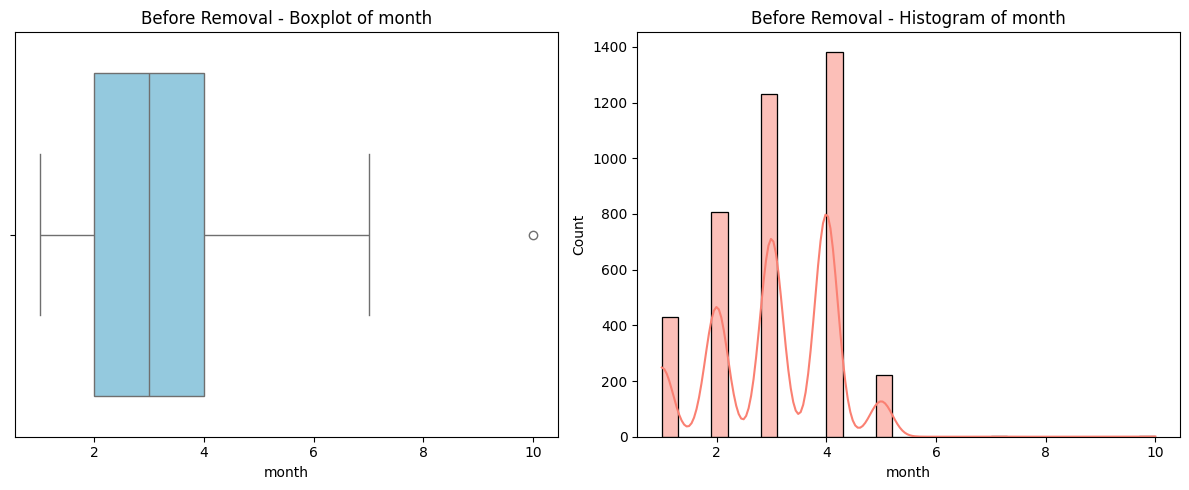

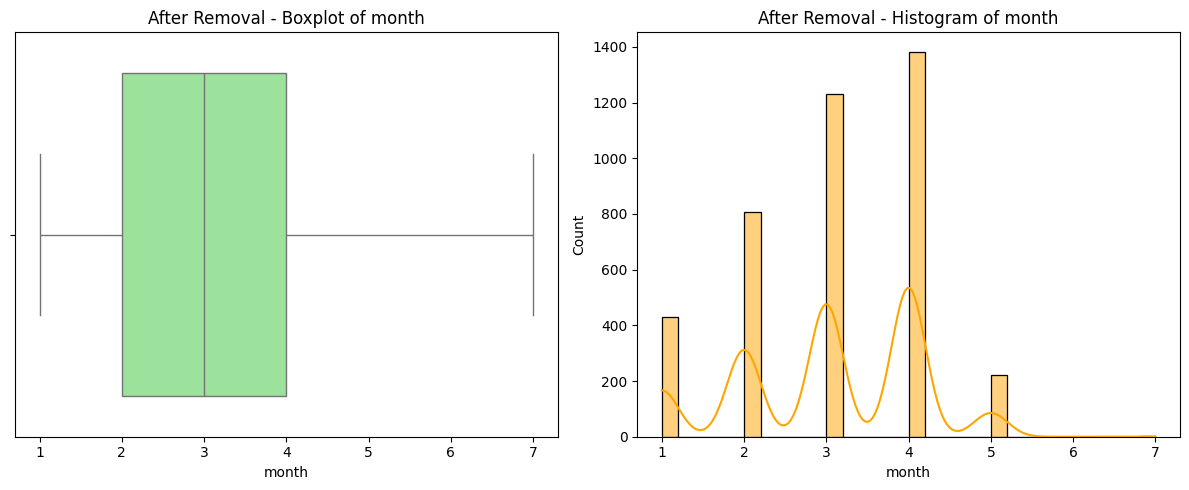

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting all numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Looping through each numeric column
for column in numeric_columns:
    # Plotting before removal
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Before Removal - Boxplot of {column}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=30, kde=True, color='salmon')
    plt.title(f'Before Removal - Histogram of {column}')
    plt.tight_layout()
    plt.show()

    # Removing outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Plotting after removal
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'After Removal - Boxplot of {column}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=30, kde=True, color='orange')
    plt.title(f'After Removal - Histogram of {column}')
    plt.tight_layout()
    plt.show()


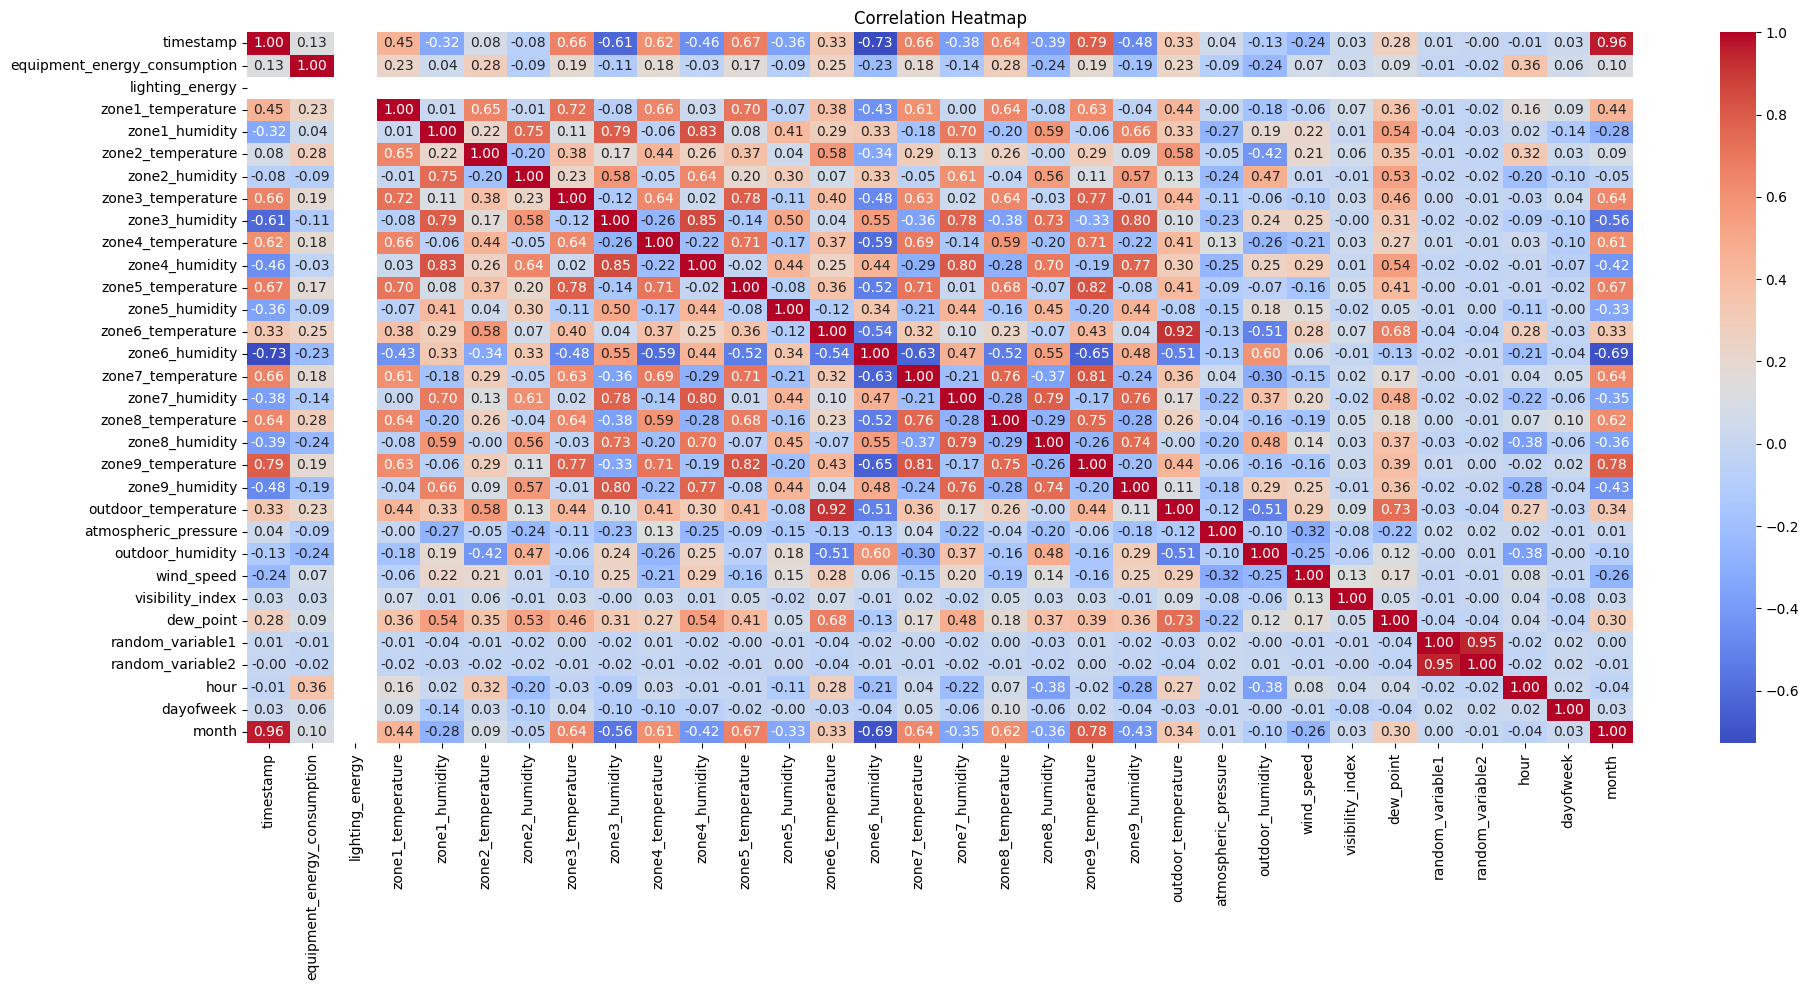

In [ ]:
# Correlation between columns
plt.figure(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
